In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# DATA PREPROCESSING

In [3]:
#Here I read the csv file from folder
#this for filling with model after applying z_score
df = pd.read_csv('data.csv',delimiter =';')
#this for filling with z_score
df_z_score = pd.read_csv('data.csv',delimiter =';')

In [4]:
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
# As we see the last 2 column free we should drop as a first step because, it is simply obvious
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df_z_score = df_z_score.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [7]:
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Here as a second step of cleaning and understanding data I printed the Nan rows wich we should clear it 
#Rows has nan values for all columns that we can't fill them
number_of_NuN_values = df.isnull().any(axis = 1)
NaN = df[number_of_NuN_values]

print(len(NaN))

114


In [9]:
#I obtained the Indexes
print(df.iloc[-115:])

            Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
9356  04/04/2005  14.00.00    2,2       1071.0    -200.0     11,9   
9357         NaN       NaN    NaN          NaN       NaN      NaN   
9358         NaN       NaN    NaN          NaN       NaN      NaN   
9359         NaN       NaN    NaN          NaN       NaN      NaN   
9360         NaN       NaN    NaN          NaN       NaN      NaN   
...          ...       ...    ...          ...       ...      ...   
9466         NaN       NaN    NaN          NaN       NaN      NaN   
9467         NaN       NaN    NaN          NaN       NaN      NaN   
9468         NaN       NaN    NaN          NaN       NaN      NaN   
9469         NaN       NaN    NaN          NaN       NaN      NaN   
9470         NaN       NaN    NaN          NaN       NaN      NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9356         1047.0    265.0         654.0    168.0        1129.0   
9357            NaN      NaN     

In [10]:
#As a second step I deleted the free rows.
df.drop(df.tail(114).index,
        inplace = True)
df_z_score.drop(df_z_score.tail(114).index,
        inplace = True)

In [11]:
display(df)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [13]:
#The third step deleting spesific columns like date,time. We do not need them while preprocessing data
#Also, We need more clear and tight columns to analyse better the data 
df = df.drop(['Date', 'Time'], axis=1)
df_z_score = df_z_score.drop(['Date', 'Time'], axis=1)

In [14]:
display(df)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [15]:
#My fourth step is changing the type of spesific columns to float to applying methods easy.
#As I see that the five columns are object type and, I changed their type to float.
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['C6H6(GT)'] = df['C6H6(GT)'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['T'] = df['T'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['RH'] = df['RH'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df['AH'] = df['AH'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [16]:
df_z_score['CO(GT)'] = df_z_score['CO(GT)'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_z_score['C6H6(GT)'] = df_z_score['C6H6(GT)'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_z_score['T'] = df_z_score['T'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_z_score['RH'] = df_z_score['RH'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_z_score['AH'] = df_z_score['AH'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


In [18]:
#In this code block I looked at if there is nan value still I can do something
#Than I saw there is no nan but as a description the some unpredicted and errors have been written as type of-200
for columns in df.columns:
    check_nan = df[columns].isnull().values.any()
    print("Column name: "+columns+"->",check_nan)

Column name: CO(GT)-> False
Column name: PT08.S1(CO)-> False
Column name: NMHC(GT)-> False
Column name: C6H6(GT)-> False
Column name: PT08.S2(NMHC)-> False
Column name: NOx(GT)-> False
Column name: PT08.S3(NOx)-> False
Column name: NO2(GT)-> False
Column name: PT08.S4(NO2)-> False
Column name: PT08.S5(O3)-> False
Column name: T-> False
Column name: RH-> False
Column name: AH-> False


In [19]:
#Than I decided to change them as NaN
df = df.replace([-200, -200.0, '-200', '-200,0'], np.nan)
df_z_score = df_z_score.replace([-200, -200.0, '-200', '-200,0'], np.nan)


In [20]:
#Now I have to handle the NaN data
for columns in df.columns:
    check_nan = df[columns].isnull().values.any()
    print("Column name: "+columns+"->",check_nan)

Column name: CO(GT)-> True
Column name: PT08.S1(CO)-> True
Column name: NMHC(GT)-> True
Column name: C6H6(GT)-> True
Column name: PT08.S2(NMHC)-> True
Column name: NOx(GT)-> True
Column name: PT08.S3(NOx)-> True
Column name: NO2(GT)-> True
Column name: PT08.S4(NO2)-> True
Column name: PT08.S5(O3)-> True
Column name: T-> True
Column name: RH-> True
Column name: AH-> True


In [21]:
#DATA CLEANING (cleaning and filling(Nan) with z score and model)

<AxesSubplot:>

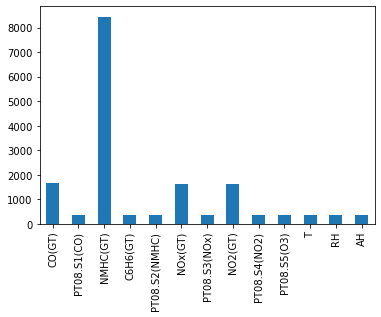

In [22]:
#Here is the distribution of the Nan values per columns


In [23]:
#As a fifth step I should drop the NMHC(GT) column becasue it has more tha 8k NaN that I cannot do anything for them
df = df.drop(['NMHC(GT)'], axis=1)
df_z_score = df_z_score.drop(['NMHC(GT)'], axis=1)

<AxesSubplot:>

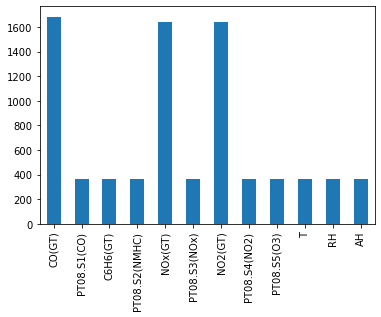

In [24]:
#Here more smooth and easy to handle with NaN data
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

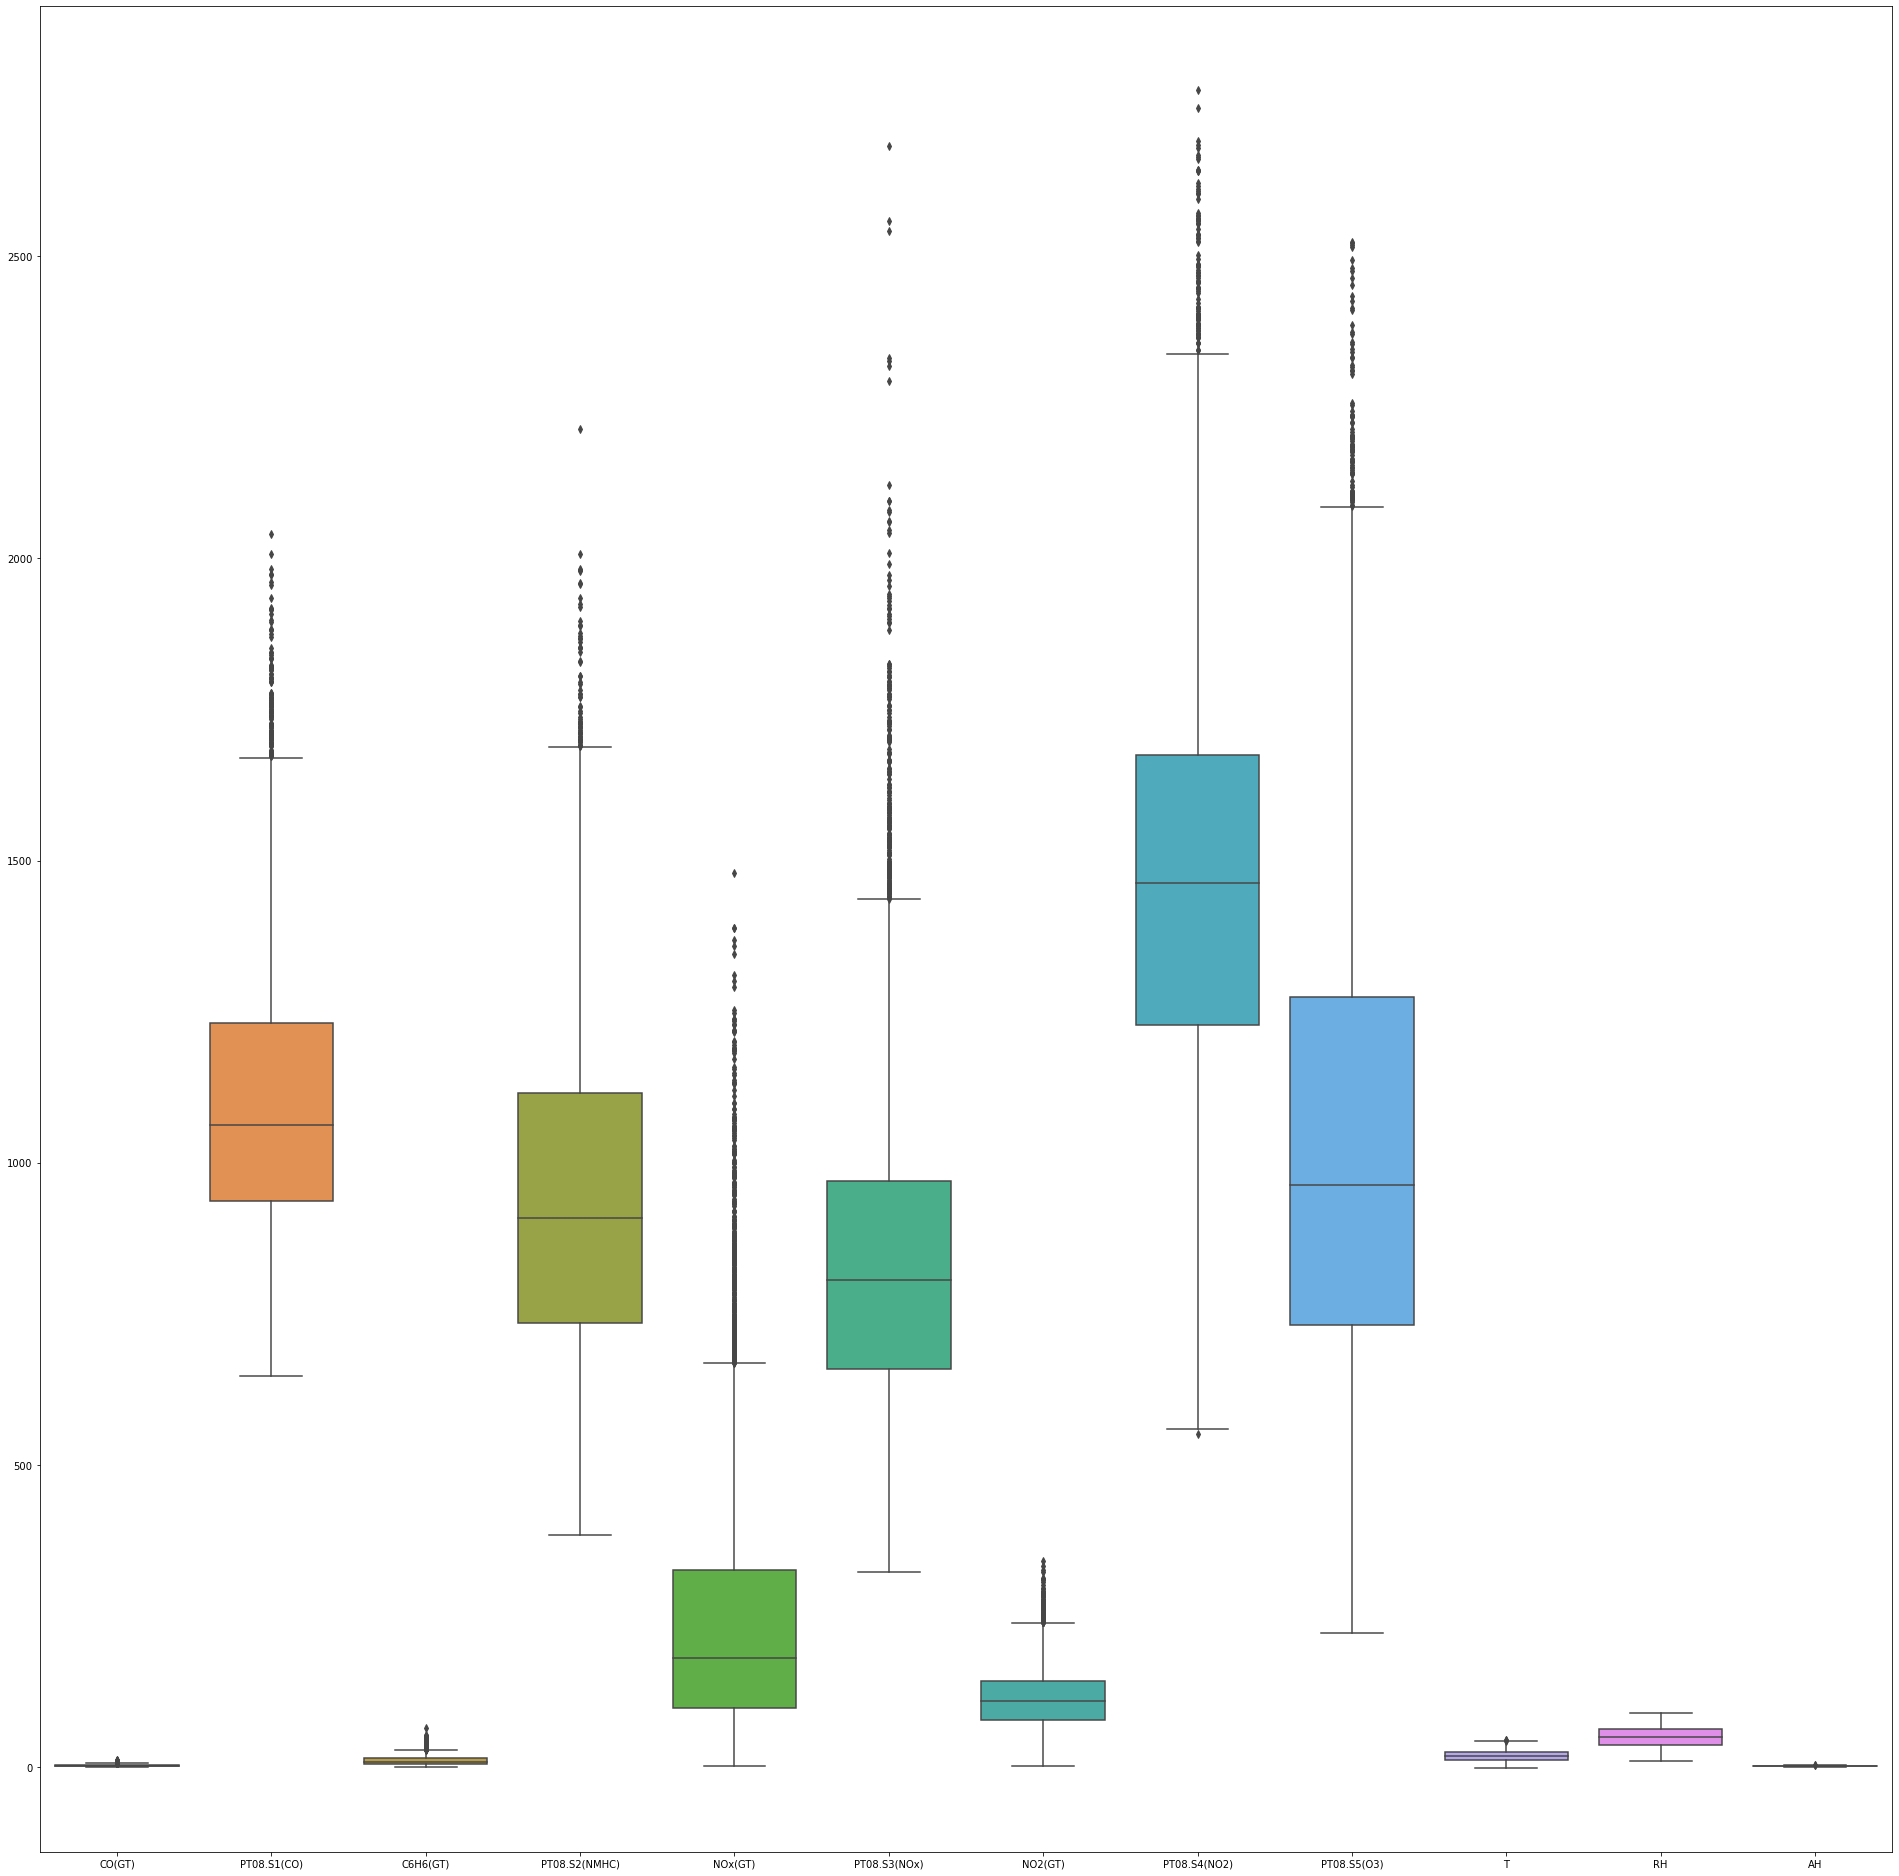

In [25]:
#Here I started to used splitted 2 data from beggining of the assignment df-df_z_score
#I'm looking dor the outliers with using boxplot that provides to see outliers.
#I decided to use Z-score to fix outlier problem and fill NaN values to df_z_sore
#Also, I'm gonna use model prediction to df after
fig = plt.figure(figsize=(130,130))
cols = [df.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=df[col], ax=ax)

    fig.tight_layout()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   C6H6(GT)       8991 non-null   float64
 3   PT08.S2(NMHC)  8991 non-null   float64
 4   NOx(GT)        7718 non-null   float64
 5   PT08.S3(NOx)   8991 non-null   float64
 6   NO2(GT)        7715 non-null   float64
 7   PT08.S4(NO2)   8991 non-null   float64
 8   PT08.S5(O3)    8991 non-null   float64
 9   T              8991 non-null   float64
 10  RH             8991 non-null   float64
 11  AH             8991 non-null   float64
dtypes: float64(12)
memory usage: 877.3 KB


In [27]:
#Here is my high-low score
print("Highest allowed",df_z_score['CO(GT)'].mean() + 3*df_z_score['CO(GT)'].std())
print("Lowest allowed",df_z_score['CO(GT)'].mean() - 3*df_z_score['CO(GT)'].std())

Highest allowed 6.5125056529265155
Lowest allowed -2.2070065650974846


In [28]:
df_z_score

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [29]:
#This function apply z_score outlier elimination to provide clean data
def outlierElimination(df):
    for column in df.columns:
        df[column] = df[column].fillna(df[column].median())
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()
        df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [30]:
df_z_score = outlierElimination(df_z_score)

C:\Users\bahak\AppData\Local\Temp\ipykernel_10204\1323301449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].median())


In [31]:
df_z_score

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [32]:
#As we see there is no outlier and outlier on my data right now
for columns in df_z_score.columns:
    check_nan = df_z_score[columns].isnull().values.any()
    print("Column name: "+columns+"->",check_nan)

Column name: CO(GT)-> False
Column name: PT08.S1(CO)-> False
Column name: C6H6(GT)-> False
Column name: PT08.S2(NMHC)-> False
Column name: NOx(GT)-> False
Column name: PT08.S3(NOx)-> False
Column name: NO2(GT)-> False
Column name: PT08.S4(NO2)-> False
Column name: PT08.S5(O3)-> False
Column name: T-> False
Column name: RH-> False
Column name: AH-> False


In [33]:
#If we look other data I should handle with different way with NaN data
for columns in df.columns:
    check_nan = df[columns].isnull().values.any()
    print("Column name: "+columns+"->",check_nan)

Column name: CO(GT)-> True
Column name: PT08.S1(CO)-> True
Column name: C6H6(GT)-> True
Column name: PT08.S2(NMHC)-> True
Column name: NOx(GT)-> True
Column name: PT08.S3(NOx)-> True
Column name: NO2(GT)-> True
Column name: PT08.S4(NO2)-> True
Column name: PT08.S5(O3)-> True
Column name: T-> True
Column name: RH-> True
Column name: AH-> True


In [34]:
#Here is the correlation table of z_score data 
df_z_score.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.756992,0.804110,0.796434,0.702628,-0.643721,0.617940,0.522593,0.739898,0.070421,-0.024132,0.041410
PT08.S1(CO),0.756992,1.000000,0.858926,0.865217,0.579915,-0.781510,0.524942,0.637621,0.875000,0.090220,0.076577,0.151623
C6H6(GT),0.804110,0.858926,1.000000,0.987015,0.562983,-0.764114,0.506834,0.747883,0.841894,0.286879,-0.142525,0.197045
PT08.S2(NMHC),0.796434,0.865217,0.987015,1.000000,0.562657,-0.807391,0.528379,0.753209,0.852130,0.312464,-0.161042,0.207167
NOx(GT),0.702628,0.579915,0.562983,0.562657,1.000000,-0.612484,0.734031,0.097968,0.666110,-0.238700,0.155270,-0.159286
PT08.S3(NOx),-0.643721,-0.781510,-0.764114,-0.807391,-0.612484,1.000000,-0.562759,-0.501602,-0.810815,-0.165574,-0.039623,-0.246207
NO2(GT),0.617940,0.524942,0.506834,0.528379,0.734031,-0.562759,1.000000,0.067675,0.587264,-0.140431,-0.145553,-0.319357
PT08.S4(NO2),0.522593,0.637621,0.747883,0.753209,0.097968,-0.501602,0.067675,1.000000,0.545994,0.614134,-0.067563,0.661699
PT08.S5(O3),0.739898,0.875000,0.841894,0.852130,0.666110,-0.810815,0.587264,0.545994,1.000000,0.006810,0.101056,0.092666
T,0.070421,0.090220,0.286879,0.312464,-0.238700,-0.165574,-0.140431,0.614134,0.006810,1.000000,-0.583193,0.647495


In [35]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [36]:
#Here my data is between (0,1)
#I apply preprocessing.normalize to data
df_z_score_normalizing = preprocessing.normalize(df_z_score)
df_z_score_normalizing = pd.DataFrame(df_z_score_normalizing,columns = df_z_score.columns)
display(df_z_score_normalizing)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.000888,0.464497,0.004064,0.357253,0.056696,0.360668,0.038594,0.577889,0.433075,0.004645,0.016701,0.000259
1,0.000737,0.476352,0.003466,0.352103,0.037975,0.432847,0.033920,0.574794,0.358370,0.004904,0.017587,0.000267
2,0.000790,0.503557,0.003233,0.337261,0.047051,0.409454,0.040945,0.558510,0.385749,0.004274,0.019395,0.000269
3,0.000778,0.486822,0.003255,0.335397,0.060853,0.386344,0.043163,0.560411,0.425615,0.003892,0.021228,0.000278
4,0.000594,0.472232,0.002413,0.310366,0.048634,0.447358,0.043065,0.553164,0.412089,0.004158,0.022127,0.000293
...,...,...,...,...,...,...,...,...,...,...,...,...
8671,0.001072,0.454265,0.004667,0.380628,0.163176,0.186339,0.065685,0.475008,0.597735,0.007571,0.010129,0.000262
8672,0.000969,0.469421,0.004601,0.414527,0.142481,0.243792,0.072250,0.510187,0.512206,0.009808,0.009566,0.000287
8673,0.001010,0.480529,0.005218,0.447287,0.123288,0.253729,0.073636,0.522186,0.459490,0.011319,0.007700,0.000270
8674,0.001027,0.490610,0.004647,0.470066,0.114948,0.343378,0.076306,0.509197,0.376639,0.013843,0.006603,0.000251


In [37]:
#Here my data is between (0,1)
#I apply minmaxscaler to data
scaler = preprocessing.MinMaxScaler()
df_z_score_Scaled = scaler.fit_transform(df_z_score)
scaled_df = pd.DataFrame(df_z_score_Scaled, columns=df_z_score.columns)
scaled_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.423729,0.675439,0.400000,0.565062,0.221922,0.567700,0.488987,0.610520,0.576174,0.333333,0.499371,0.287139
1,0.322034,0.609162,0.313793,0.483957,0.136671,0.663948,0.396476,0.536094,0.406644,0.326882,0.484277,0.270955
2,0.355932,0.716374,0.300000,0.469697,0.174560,0.636215,0.493392,0.533856,0.465063,0.296774,0.563522,0.283331
3,0.355932,0.691033,0.306897,0.477718,0.230041,0.597064,0.528634,0.550084,0.538946,0.277419,0.638994,0.301618
4,0.254237,0.589669,0.213793,0.377897,0.174560,0.689233,0.502203,0.497482,0.485682,0.281720,0.633962,0.302670


In [38]:
#We can simply see the differencse with the z_score data
#z_score correlated better than the normal data cause the df data is not been handled yet
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.879288,0.931078,0.915514,0.795028,-0.703446,0.683343,0.630703,0.854182,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.883795,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.931078,0.883795,1.000000,0.981950,0.718839,-0.735744,0.614474,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.915514,0.892964,0.981950,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.718839,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.735744,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.614474,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.765731,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.854182,0.899324,0.865689,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.022109,0.048627,0.198956,0.241373,-0.269683,-0.145112,-0.186533,0.561270,-0.027172,1.000000,-0.578621,0.656397


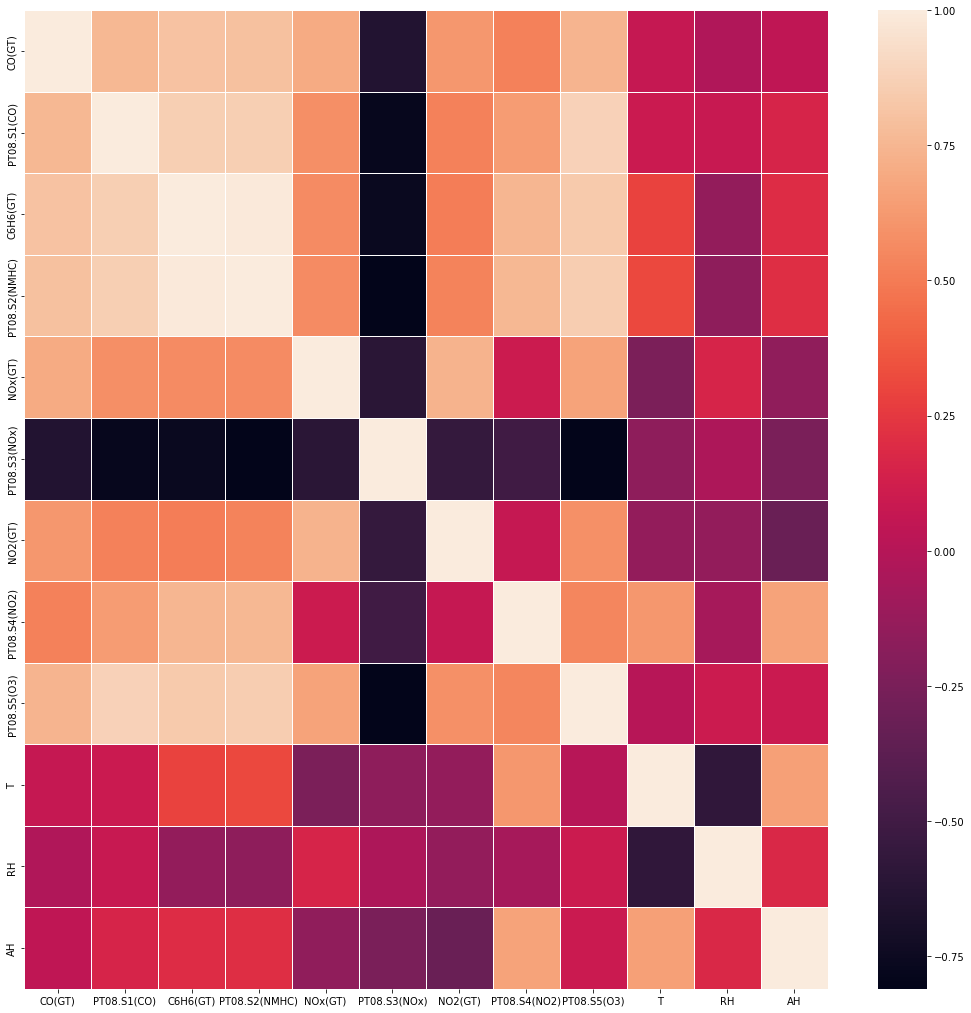

In [39]:
#Here is the heatmap of two data
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_z_score.corr(), annot=False, linewidths=.5,fmt= '.2f',ax=ax )
plt.show()

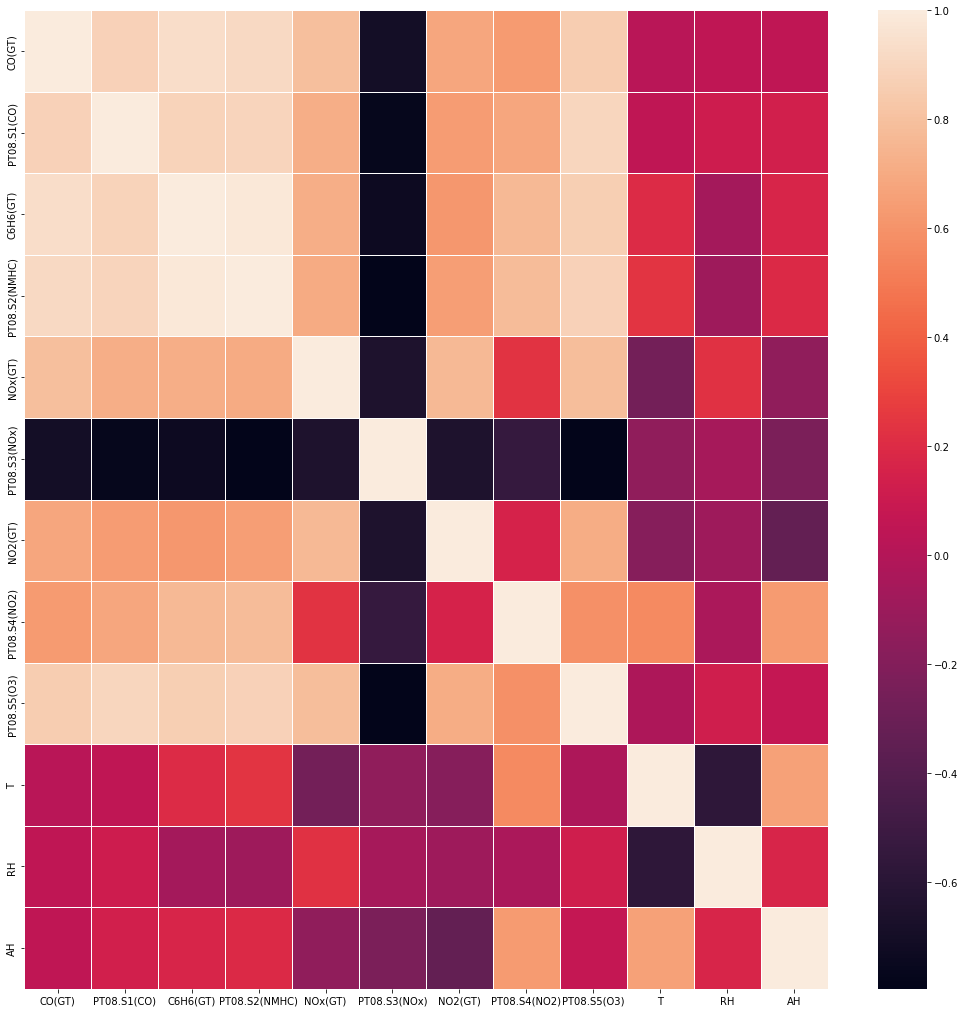

In [40]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=False, linewidths=.5,fmt= '.2f',ax=ax )
plt.show()

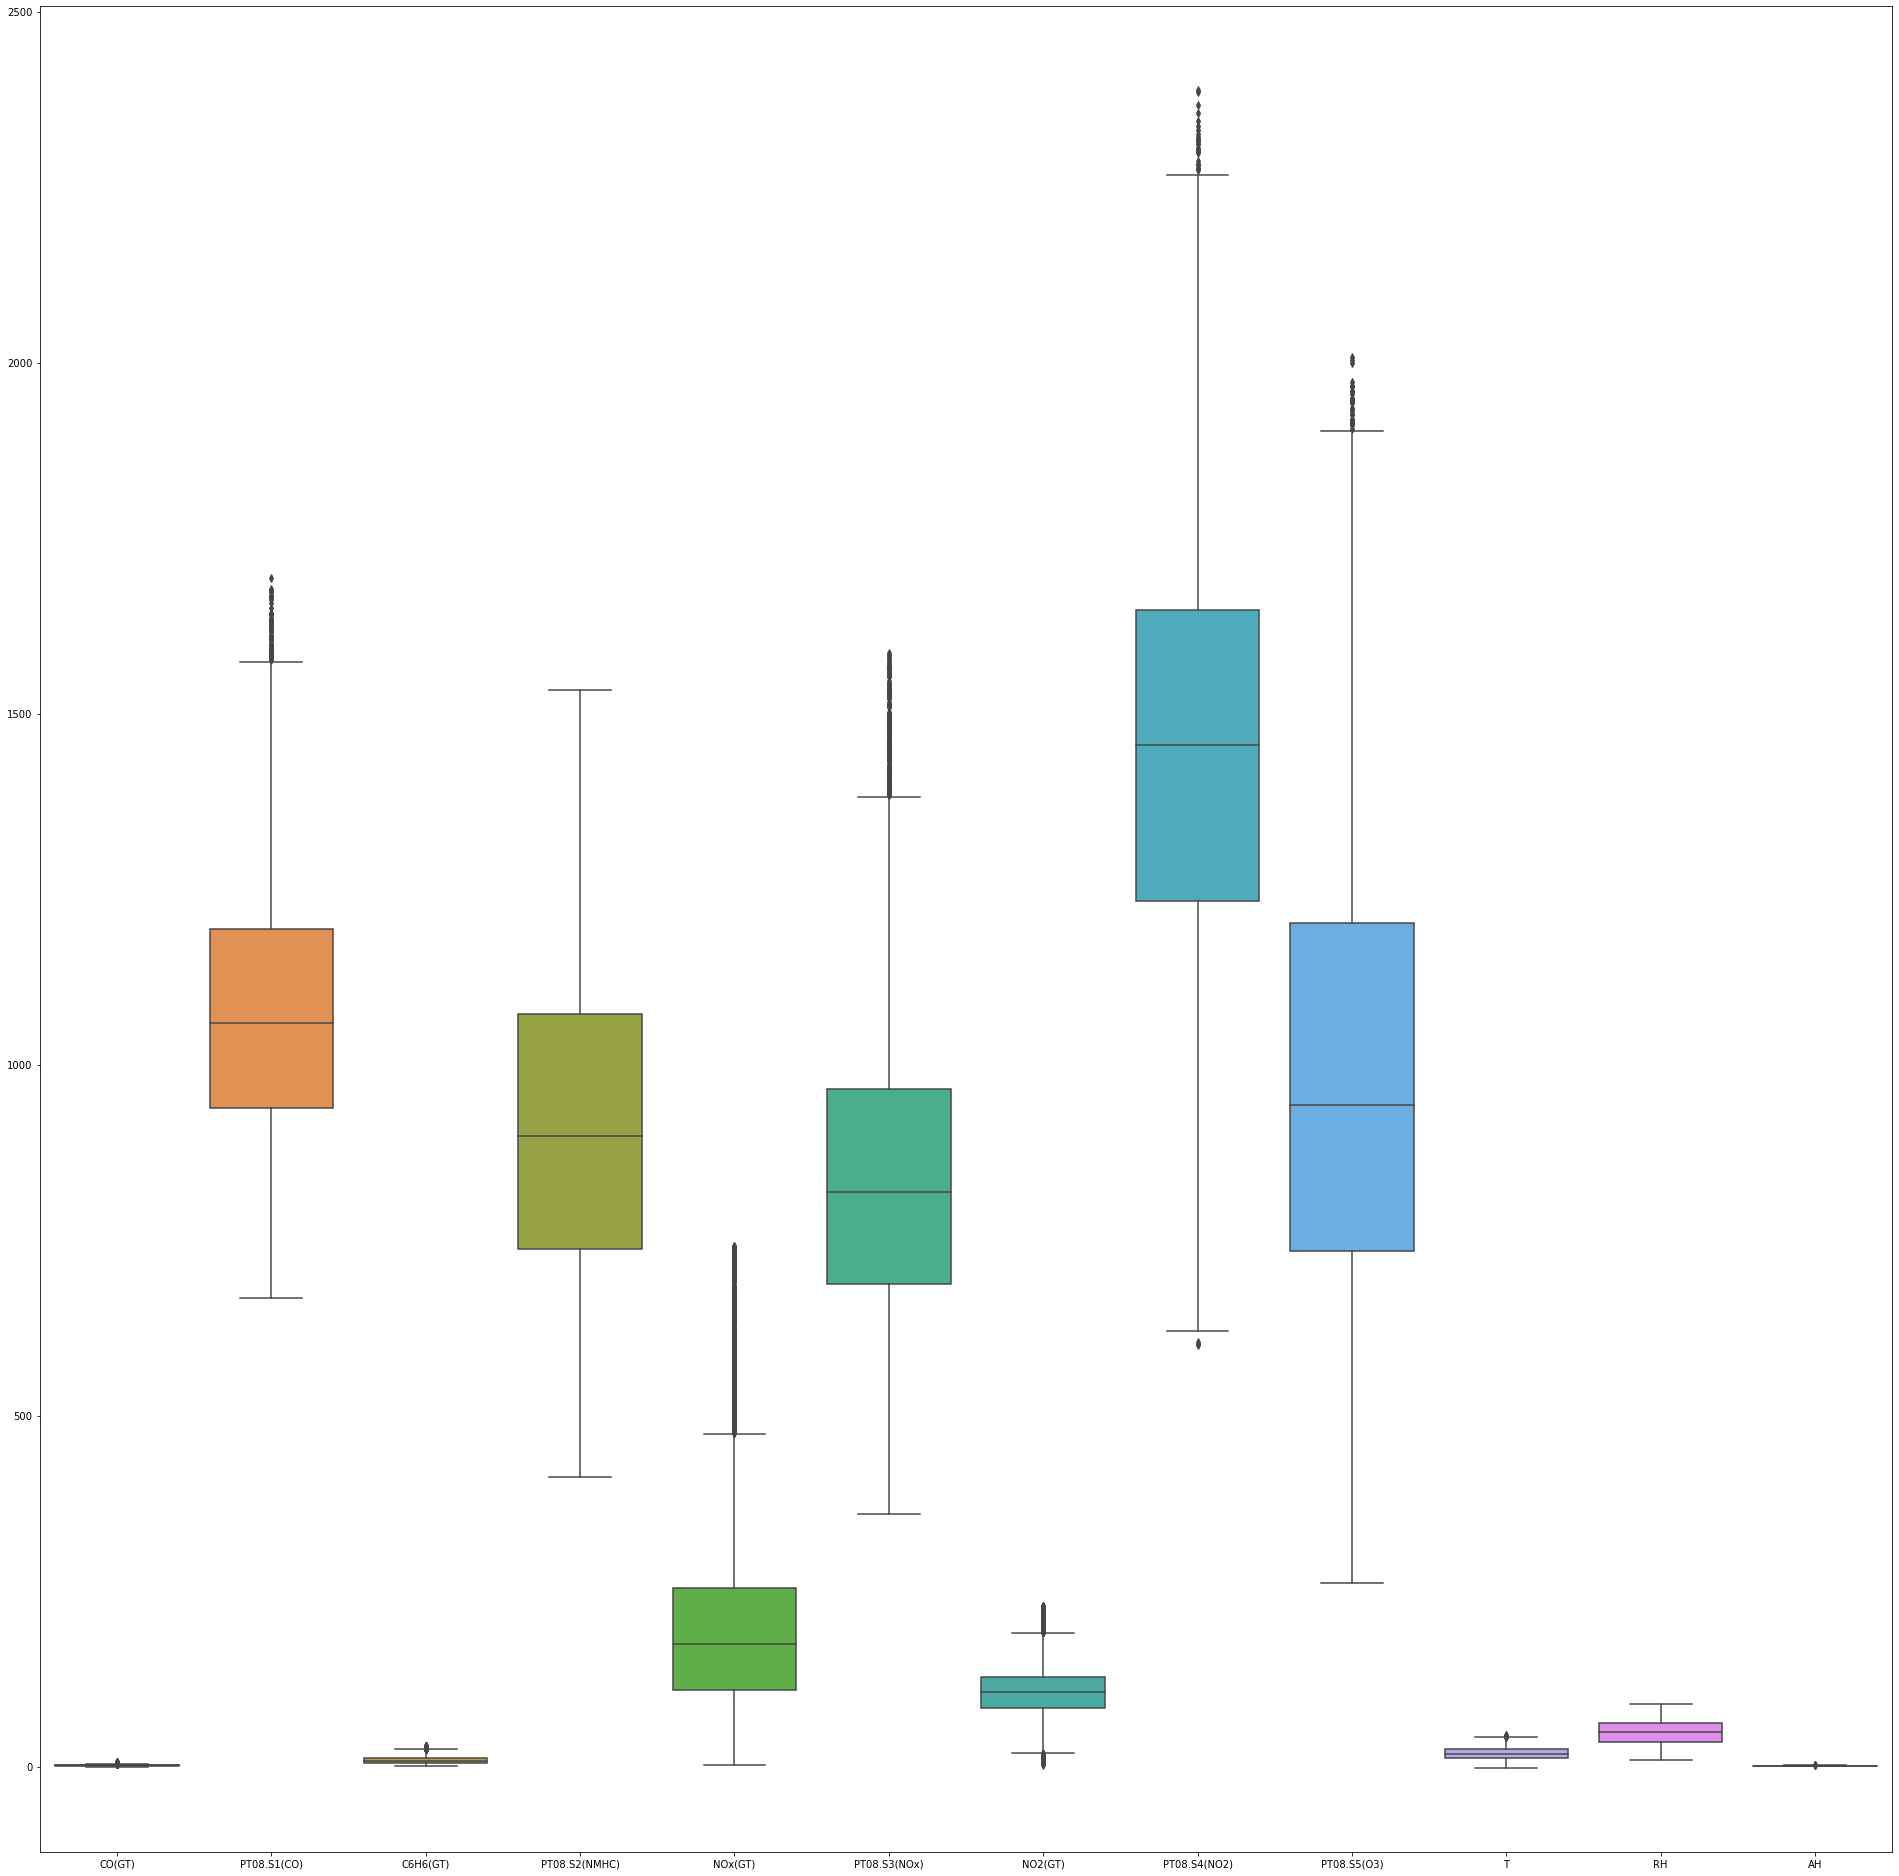

In [41]:
#Now we can see the outliers cleaned and the smooth data is prepared with z_score
fig = plt.figure(figsize=(130,130))
cols = [df_z_score.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=df_z_score[col], ax=ax)

    fig.tight_layout()

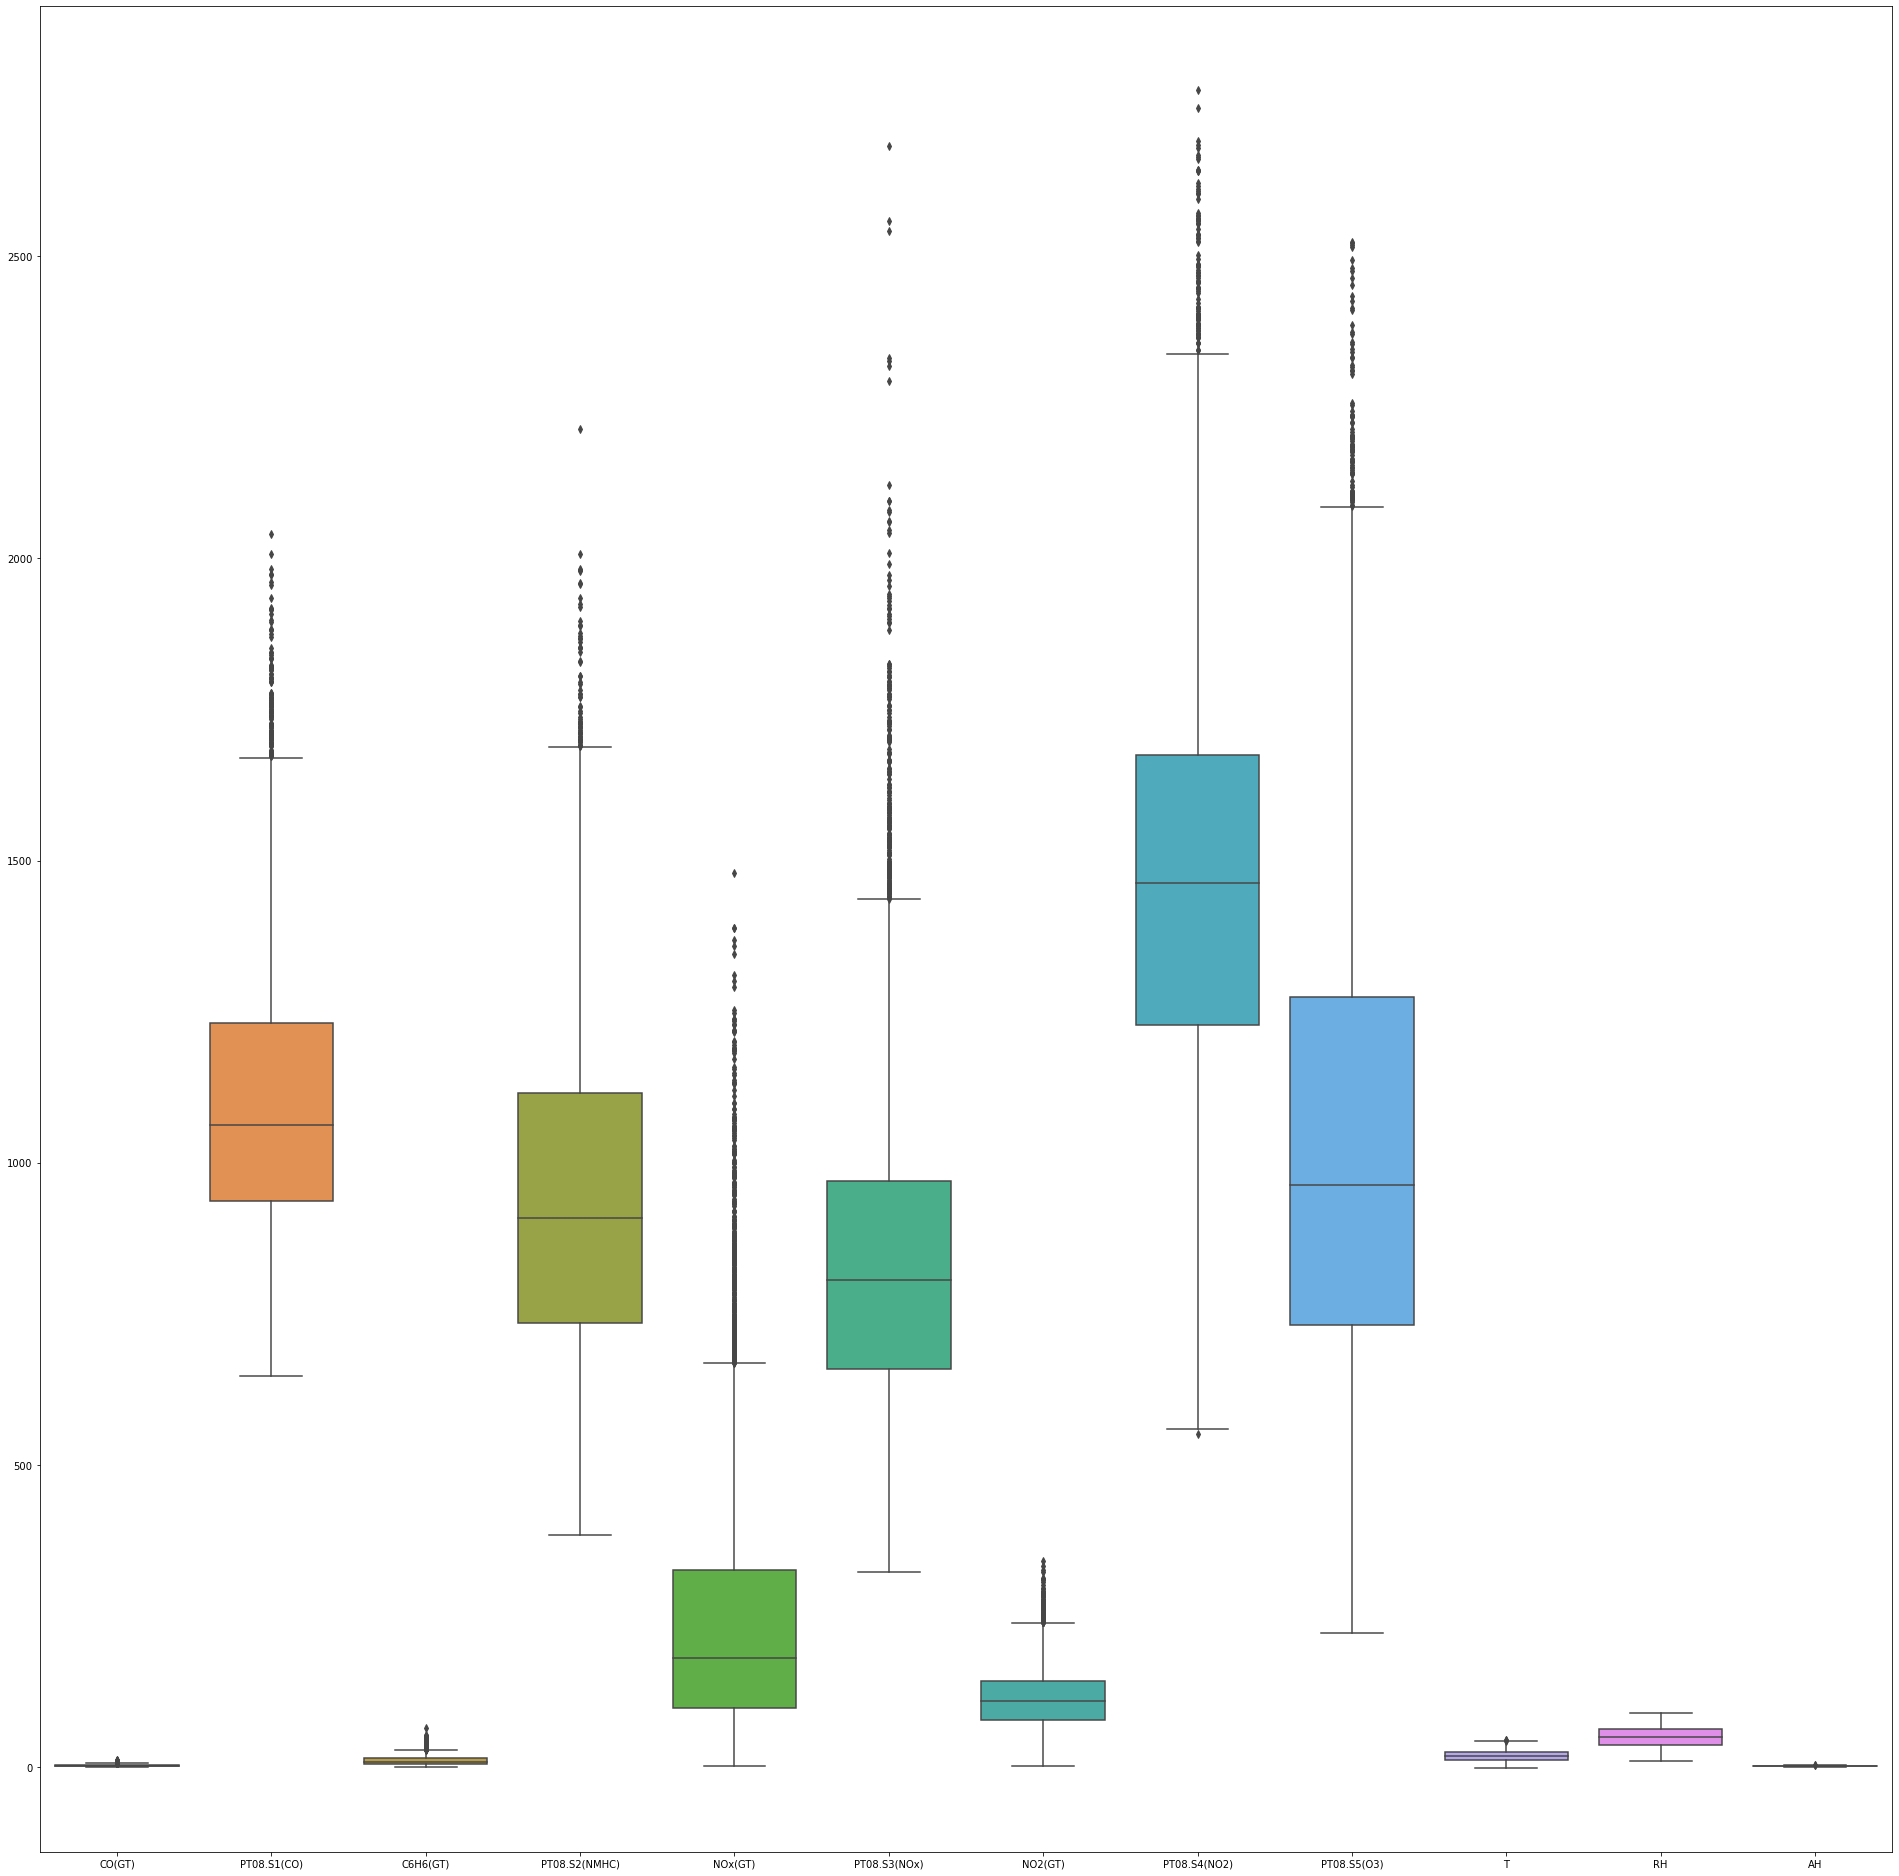

In [42]:
#The begginner data still same I have to handle with it
fig = plt.figure(figsize=(130,130))
cols = [df.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=df[col], ax=ax)

    fig.tight_layout()

<AxesSubplot:>

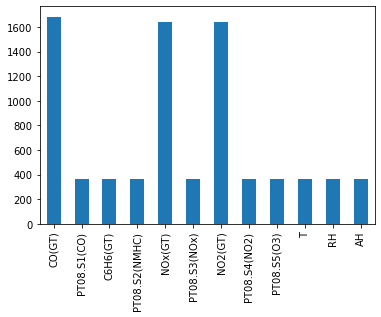

In [43]:
#Now I see the relationship between the columns
#I'm gonna take CO(GT)-PT08.S1(CO) / NOx(GT)-PT08.S3(NOx) / NO2(GT)-PT08.S4(NO2)  together

df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [44]:
#I'm filling the column who has lowest nan values
#PART1
mean_value=df['PT08.S1(CO)'].mean()
  
df['PT08.S1(CO)'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
      CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        2.6       1360.0      11.9         1046.0    166.0        1056.0   
1        2.0       1292.0       9.4          955.0    103.0        1174.0   
2        2.2       1402.0       9.0          939.0    131.0        1140.0   
3        2.2       1376.0       9.2          948.0    172.0        1092.0   
4        1.6       1272.0       6.5          836.0    131.0        1205.0   
...      ...          ...       ...            ...      ...           ...   
9352     3.1       1314.0      13.5         1101.0    472.0         539.0   
9353     2.4       1163.0      11.4         1027.0    353.0         604.0   
9354     2.4       1142.0      12.4         1063.0    293.0         603.0   
9355     2.1       1003.0       9.5          961.0    235.0         702.0   
9356     2.2       1071.0      11.9         1047.0    265.0         654.0   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH    

<AxesSubplot:>

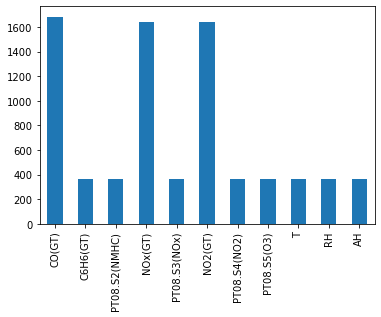

In [45]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [46]:
#Now I applied the 2 relationship columns a linear regression model and predicted their values
#The idea is filling the lowest one with mean and predicting the nan values of highest one
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()

In [47]:
#Separating data two different dataframe one has nan values only one has orginal values only
dataWithoutNan = pd.DataFrame(columns = ['CO(GT)','PT08.S1(CO)'])
dataWithNan = pd.DataFrame(columns = ['CO(GT)','PT08.S1(CO)'])

In [48]:
j = 0
k = 0
for i, row in df.iterrows():
    if(np.isnan(row['CO(GT)'])):
        dataWithNan.loc[j] = pd.Series({'CO(GT)': np.nan, 'PT08.S1(CO)':row['PT08.S1(CO)']})
        j+=1
    else:
        dataWithoutNan.loc[k] = pd.Series({'CO(GT)': row['CO(GT)'], 'PT08.S1(CO)':row['PT08.S1(CO)']})
        k+=1

In [49]:
dataWithNan

,CO(GT),PT08.S1(CO)
0,NaN,1011.0
1,NaN,831.0
2,NaN,1545.0
3,NaN,1147.0
4,NaN,1130.0
...,...,...
1678,NaN,993.0
1679,NaN,1122.0
1680,NaN,883.0
1681,NaN,818.0


In [50]:
dataWithoutNan

,CO(GT),PT08.S1(CO)
0,2.6,1360.0
1,2.0,1292.0
2,2.2,1402.0
3,2.2,1376.0
4,1.6,1272.0
...,...,...
7669,3.1,1314.0
7670,2.4,1163.0
7671,2.4,1142.0
7672,2.1,1003.0


In [51]:
#Now I splitted the data and fitting the linear regression 
X_train = dataWithoutNan.drop(['CO(GT)'], axis=1)
Y_train = dataWithoutNan.drop(['PT08.S1(CO)'], axis=1)

In [52]:
X_test = dataWithNan.drop(['CO(GT)'], axis=1)
#Y_test = dataWithoutNan.drop(['PT08.S1(CO)'], axis=1)

In [53]:
linearReg.fit(X_train,Y_train)

LinearRegression()

In [54]:
#Now the model predicts the nan values
coGtPredicted = pd.DataFrame(columns = ['CO(GT)'])
coGtPredicted['CO(GT)'] = pd.DataFrame(linearReg.predict(X_test))

In [55]:
#And filling them to the data
dataWithNan['CO(GT)'].fillna(coGtPredicted['CO(GT)'],inplace = True)

In [56]:
dataWithNan

,CO(GT),PT08.S1(CO)
0,1.580827,1011.0
1,0.542213,831.0
2,4.662051,1545.0
3,2.365558,1147.0
4,2.267467,1130.0
...,...,...
1678,1.476966,993.0
1679,2.221306,1122.0
1680,0.842257,883.0
1681,0.467201,818.0


In [57]:
#Here I merged them as original part of data
dfPredicted = pd.concat([dataWithNan, dataWithoutNan], axis=0)

In [58]:
dfPredicted

,CO(GT),PT08.S1(CO)
0,1.580827,1011.0
1,0.542213,831.0
2,4.662051,1545.0
3,2.365558,1147.0
4,2.267467,1130.0
...,...,...
7669,3.100000,1314.0
7670,2.400000,1163.0
7671,2.400000,1142.0
7672,2.100000,1003.0


In [59]:
dfPredicted_cogt_pt08s1co = dfPredicted.reset_index(drop = True)

In [60]:
dfPredicted 

,CO(GT),PT08.S1(CO)
0,1.580827,1011.0
1,0.542213,831.0
2,4.662051,1545.0
3,2.365558,1147.0
4,2.267467,1130.0
...,...,...
7669,3.100000,1314.0
7670,2.400000,1163.0
7671,2.400000,1142.0
7672,2.100000,1003.0


In [61]:
dfPredicted = dfPredicted.drop(['PT08.S1(CO)'], axis=1)

<AxesSubplot:>

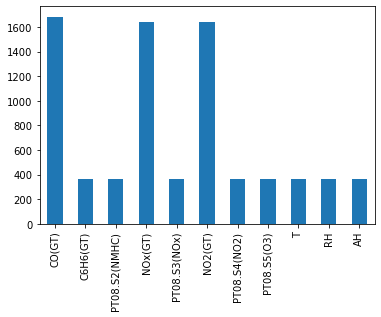

In [62]:
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')

In [63]:
dfCurrent = df.drop(['CO(GT)'], axis=1)

In [64]:
#Here I inserting the predicted column to original column
dfCurrent.insert(0,'CO(GT)',dfPredicted)
dfCurrent

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.580827,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,0.542213,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,4.662051,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.365558,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2.267467,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.100000,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.400000,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.400000,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.100000,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


<AxesSubplot:>

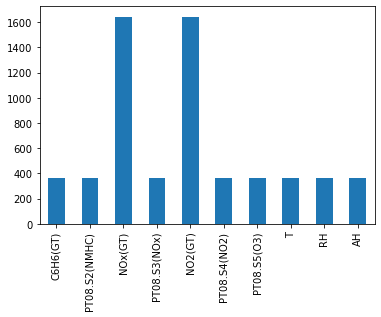

In [65]:
#part by part I cleaning the Nan and after 3 step I will have clean and ready data
dfCurrent.isna().sum()[dfCurrent.isna().sum()>0].plot(kind='bar')

In [66]:
#PART2
mean_value=dfCurrent['PT08.S3(NOx)'].mean()
  
dfCurrent['PT08.S3(NOx)'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(dfCurrent)

Updated Dataframe:
        CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     1.580827       1360.0      11.9         1046.0    166.0        1056.0   
1     0.542213       1292.0       9.4          955.0    103.0        1174.0   
2     4.662051       1402.0       9.0          939.0    131.0        1140.0   
3     2.365558       1376.0       9.2          948.0    172.0        1092.0   
4     2.267467       1272.0       6.5          836.0    131.0        1205.0   
...        ...          ...       ...            ...      ...           ...   
9352  3.100000       1314.0      13.5         1101.0    472.0         539.0   
9353  2.400000       1163.0      11.4         1027.0    353.0         604.0   
9354  2.400000       1142.0      12.4         1063.0    293.0         603.0   
9355  2.100000       1003.0       9.5          961.0    235.0         702.0   
9356  2.200000       1071.0      11.9         1047.0    265.0         654.0   

      NO2(GT)  PT08.S4(NO2)  PT0

In [67]:
linearReg = LinearRegression()

dataWithoutNan = pd.DataFrame(columns = ['NOx(GT)','PT08.S3(NOx)'])
dataWithNan = pd.DataFrame(columns = ['NOx(GT)','PT08.S3(NOx)'])

j = 0
k = 0
for i, row in dfCurrent.iterrows():
    if(np.isnan(row['NOx(GT)'])):
        dataWithNan.loc[j] = pd.Series({'NOx(GT)': np.nan, 'PT08.S3(NOx)':row['PT08.S3(NOx)']})
        j+=1
    else:
        dataWithoutNan.loc[k] = pd.Series({'NOx(GT)': row['NOx(GT)'], 'PT08.S3(NOx)':row['PT08.S3(NOx)']})
        k+=1
        
X_train = dataWithoutNan.drop(['NOx(GT)'], axis=1)
Y_train = dataWithoutNan.drop(['PT08.S3(NOx)'], axis=1)
X_test = dataWithNan.drop(['NOx(GT)'], axis=1)

linearReg.fit(X_train,Y_train)

coGtPredicted = pd.DataFrame(columns = ['NOx(GT)'])
coGtPredicted['NOx(GT)'] = pd.DataFrame(linearReg.predict(X_test))

dataWithNan['NOx(GT)'].fillna(coGtPredicted['NOx(GT)'],inplace = True)

dfPredicted = pd.concat([dataWithNan, dataWithoutNan], axis=0)

dfPredicted_cogt_pt08s1co = dfPredicted.reset_index(drop = True)

dfPredicted 

,NOx(GT),PT08.S3(NOx)
0,-215.791241,1705.0
1,-202.646838,1680.0
2,277.386774,767.0
3,60.767006,1179.0
4,196.417249,921.0
...,...,...
7713,472.000000,539.0
7714,353.000000,604.0
7715,293.000000,603.0
7716,235.000000,702.0


In [68]:
dfPredicted = dfPredicted.drop(['PT08.S3(NOx)'], axis=1)

In [69]:
dfCurrent = dfCurrent.drop(['NOx(GT)'], axis=1)

In [70]:
dfCurrent.insert(4,'NOx(GT)',dfPredicted)
dfCurrent

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.580827,1360.0,11.9,1046.0,-215.791241,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,0.542213,1292.0,9.4,955.0,-202.646838,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,4.662051,1402.0,9.0,939.0,277.386774,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.365558,1376.0,9.2,948.0,60.767006,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2.267467,1272.0,6.5,836.0,196.417249,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.100000,1314.0,13.5,1101.0,472.000000,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.400000,1163.0,11.4,1027.0,353.000000,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.400000,1142.0,12.4,1063.0,293.000000,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.100000,1003.0,9.5,961.0,235.000000,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


<AxesSubplot:>

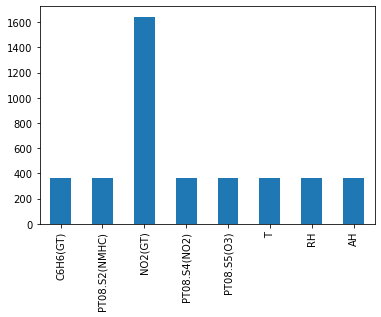

In [71]:
dfCurrent.isna().sum()[dfCurrent.isna().sum()>0].plot(kind='bar')

In [72]:
#PART3
mean_value=dfCurrent['PT08.S4(NO2)'].mean()

dfCurrent['PT08.S4(NO2)'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(dfCurrent)

Updated Dataframe:
        CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
0     1.580827       1360.0      11.9         1046.0 -215.791241   
1     0.542213       1292.0       9.4          955.0 -202.646838   
2     4.662051       1402.0       9.0          939.0  277.386774   
3     2.365558       1376.0       9.2          948.0   60.767006   
4     2.267467       1272.0       6.5          836.0  196.417249   
...        ...          ...       ...            ...         ...   
9352  3.100000       1314.0      13.5         1101.0  472.000000   
9353  2.400000       1163.0      11.4         1027.0  353.000000   
9354  2.400000       1142.0      12.4         1063.0  293.000000   
9355  2.100000       1003.0       9.5          961.0  235.000000   
9356  2.200000       1071.0      11.9         1047.0  265.000000   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1         

In [73]:
linearReg = LinearRegression()

dataWithoutNan = pd.DataFrame(columns = ['NO2(GT)','PT08.S4(NO2)'])
dataWithNan = pd.DataFrame(columns = ['NO2(GT)','PT08.S4(NO2)'])

j = 0
k = 0
for i, row in dfCurrent.iterrows():
    if(np.isnan(row['NO2(GT)'])):
        dataWithNan.loc[j] = pd.Series({'NO2(GT)': np.nan, 'PT08.S4(NO2)':row['PT08.S4(NO2)']})
        j+=1
    else:
        dataWithoutNan.loc[k] = pd.Series({'NO2(GT)': row['NO2(GT)'], 'PT08.S4(NO2)':row['PT08.S4(NO2)']})
        k+=1
        
X_train = dataWithoutNan.drop(['NO2(GT)'], axis=1)
Y_train = dataWithoutNan.drop(['PT08.S4(NO2)'], axis=1)
X_test = dataWithNan.drop(['NO2(GT)'], axis=1)

linearReg.fit(X_train,Y_train)

coGtPredicted = pd.DataFrame(columns = ['NO2(GT)'])
coGtPredicted['NO2(GT)'] = pd.DataFrame(linearReg.predict(X_test))

dataWithNan['NO2(GT)'].fillna(coGtPredicted['NO2(GT)'],inplace = True)

dfPredicted = pd.concat([dataWithNan, dataWithoutNan], axis=0)

dfPredicted_cogt_pt08s1co = dfPredicted.reset_index(drop = True)

dfPredicted 

,NO2(GT),PT08.S4(NO2)
0,108.479531,1235.0
1,107.460315,1187.0
2,125.954851,2058.0
3,111.558415,1380.0
4,116.654499,1620.0
...,...,...
7710,190.000000,1374.0
7711,179.000000,1264.0
7712,175.000000,1241.0
7713,156.000000,1041.0


In [74]:
dfPredicted = dfPredicted.drop(['PT08.S4(NO2)'], axis=1)

In [75]:
dfCurrent = dfCurrent.drop(['NO2(GT)'], axis=1)

In [76]:
dfCurrent.insert(6,'NO2(GT)',dfPredicted)
dfCurrent

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.580827,1360.0,11.9,1046.0,-215.791241,1056.0,108.479531,1692.0,1268.0,13.6,48.9,0.7578
1,0.542213,1292.0,9.4,955.0,-202.646838,1174.0,107.460315,1559.0,972.0,13.3,47.7,0.7255
2,4.662051,1402.0,9.0,939.0,277.386774,1140.0,125.954851,1555.0,1074.0,11.9,54.0,0.7502
3,2.365558,1376.0,9.2,948.0,60.767006,1092.0,111.558415,1584.0,1203.0,11.0,60.0,0.7867
4,2.267467,1272.0,6.5,836.0,196.417249,1205.0,116.654499,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.100000,1314.0,13.5,1101.0,472.000000,539.0,190.000000,1374.0,1729.0,21.9,29.3,0.7568
9353,2.400000,1163.0,11.4,1027.0,353.000000,604.0,179.000000,1264.0,1269.0,24.3,23.7,0.7119
9354,2.400000,1142.0,12.4,1063.0,293.000000,603.0,175.000000,1241.0,1092.0,26.9,18.3,0.6406
9355,2.100000,1003.0,9.5,961.0,235.000000,702.0,156.000000,1041.0,770.0,28.3,13.5,0.5139


<AxesSubplot:>

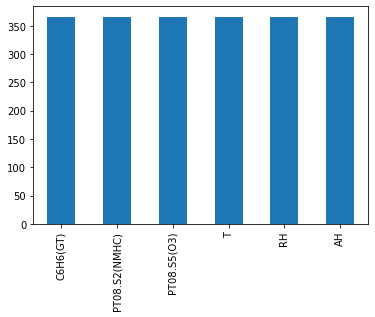

In [77]:
dfCurrent.isna().sum()[dfCurrent.isna().sum()>0].plot(kind='bar')

In [78]:
#PART4
#Here I have 6 columns and no relationship between them then I decided to fill them with mean.
mean_value=dfCurrent['C6H6(GT)'].mean()
dfCurrent['C6H6(GT)'].fillna(value=mean_value, inplace=True)

mean_value=dfCurrent['PT08.S2(NMHC)'].mean()
dfCurrent['PT08.S2(NMHC)'].fillna(value=mean_value, inplace=True)  

mean_value=dfCurrent['PT08.S5(O3)'].mean()
dfCurrent['PT08.S5(O3)'].fillna(value=mean_value, inplace=True)  

mean_value=dfCurrent['T'].mean()
dfCurrent['T'].fillna(value=mean_value, inplace=True)  

mean_value=dfCurrent['RH'].mean()
dfCurrent['RH'].fillna(value=mean_value, inplace=True)  

mean_value=dfCurrent['AH'].mean()
dfCurrent['AH'].fillna(value=mean_value, inplace=True)  



In [79]:
#As we can see the data is cleaned from nan still we have outliers.
dfCurrent.isna().sum().sum()

0

In [80]:
dfCurrent

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.580827,1360.0,11.9,1046.0,-215.791241,1056.0,108.479531,1692.0,1268.0,13.6,48.9,0.7578
1,0.542213,1292.0,9.4,955.0,-202.646838,1174.0,107.460315,1559.0,972.0,13.3,47.7,0.7255
2,4.662051,1402.0,9.0,939.0,277.386774,1140.0,125.954851,1555.0,1074.0,11.9,54.0,0.7502
3,2.365558,1376.0,9.2,948.0,60.767006,1092.0,111.558415,1584.0,1203.0,11.0,60.0,0.7867
4,2.267467,1272.0,6.5,836.0,196.417249,1205.0,116.654499,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.100000,1314.0,13.5,1101.0,472.000000,539.0,190.000000,1374.0,1729.0,21.9,29.3,0.7568
9353,2.400000,1163.0,11.4,1027.0,353.000000,604.0,179.000000,1264.0,1269.0,24.3,23.7,0.7119
9354,2.400000,1142.0,12.4,1063.0,293.000000,603.0,175.000000,1241.0,1092.0,26.9,18.3,0.6406
9355,2.100000,1003.0,9.5,961.0,235.000000,702.0,156.000000,1041.0,770.0,28.3,13.5,0.5139


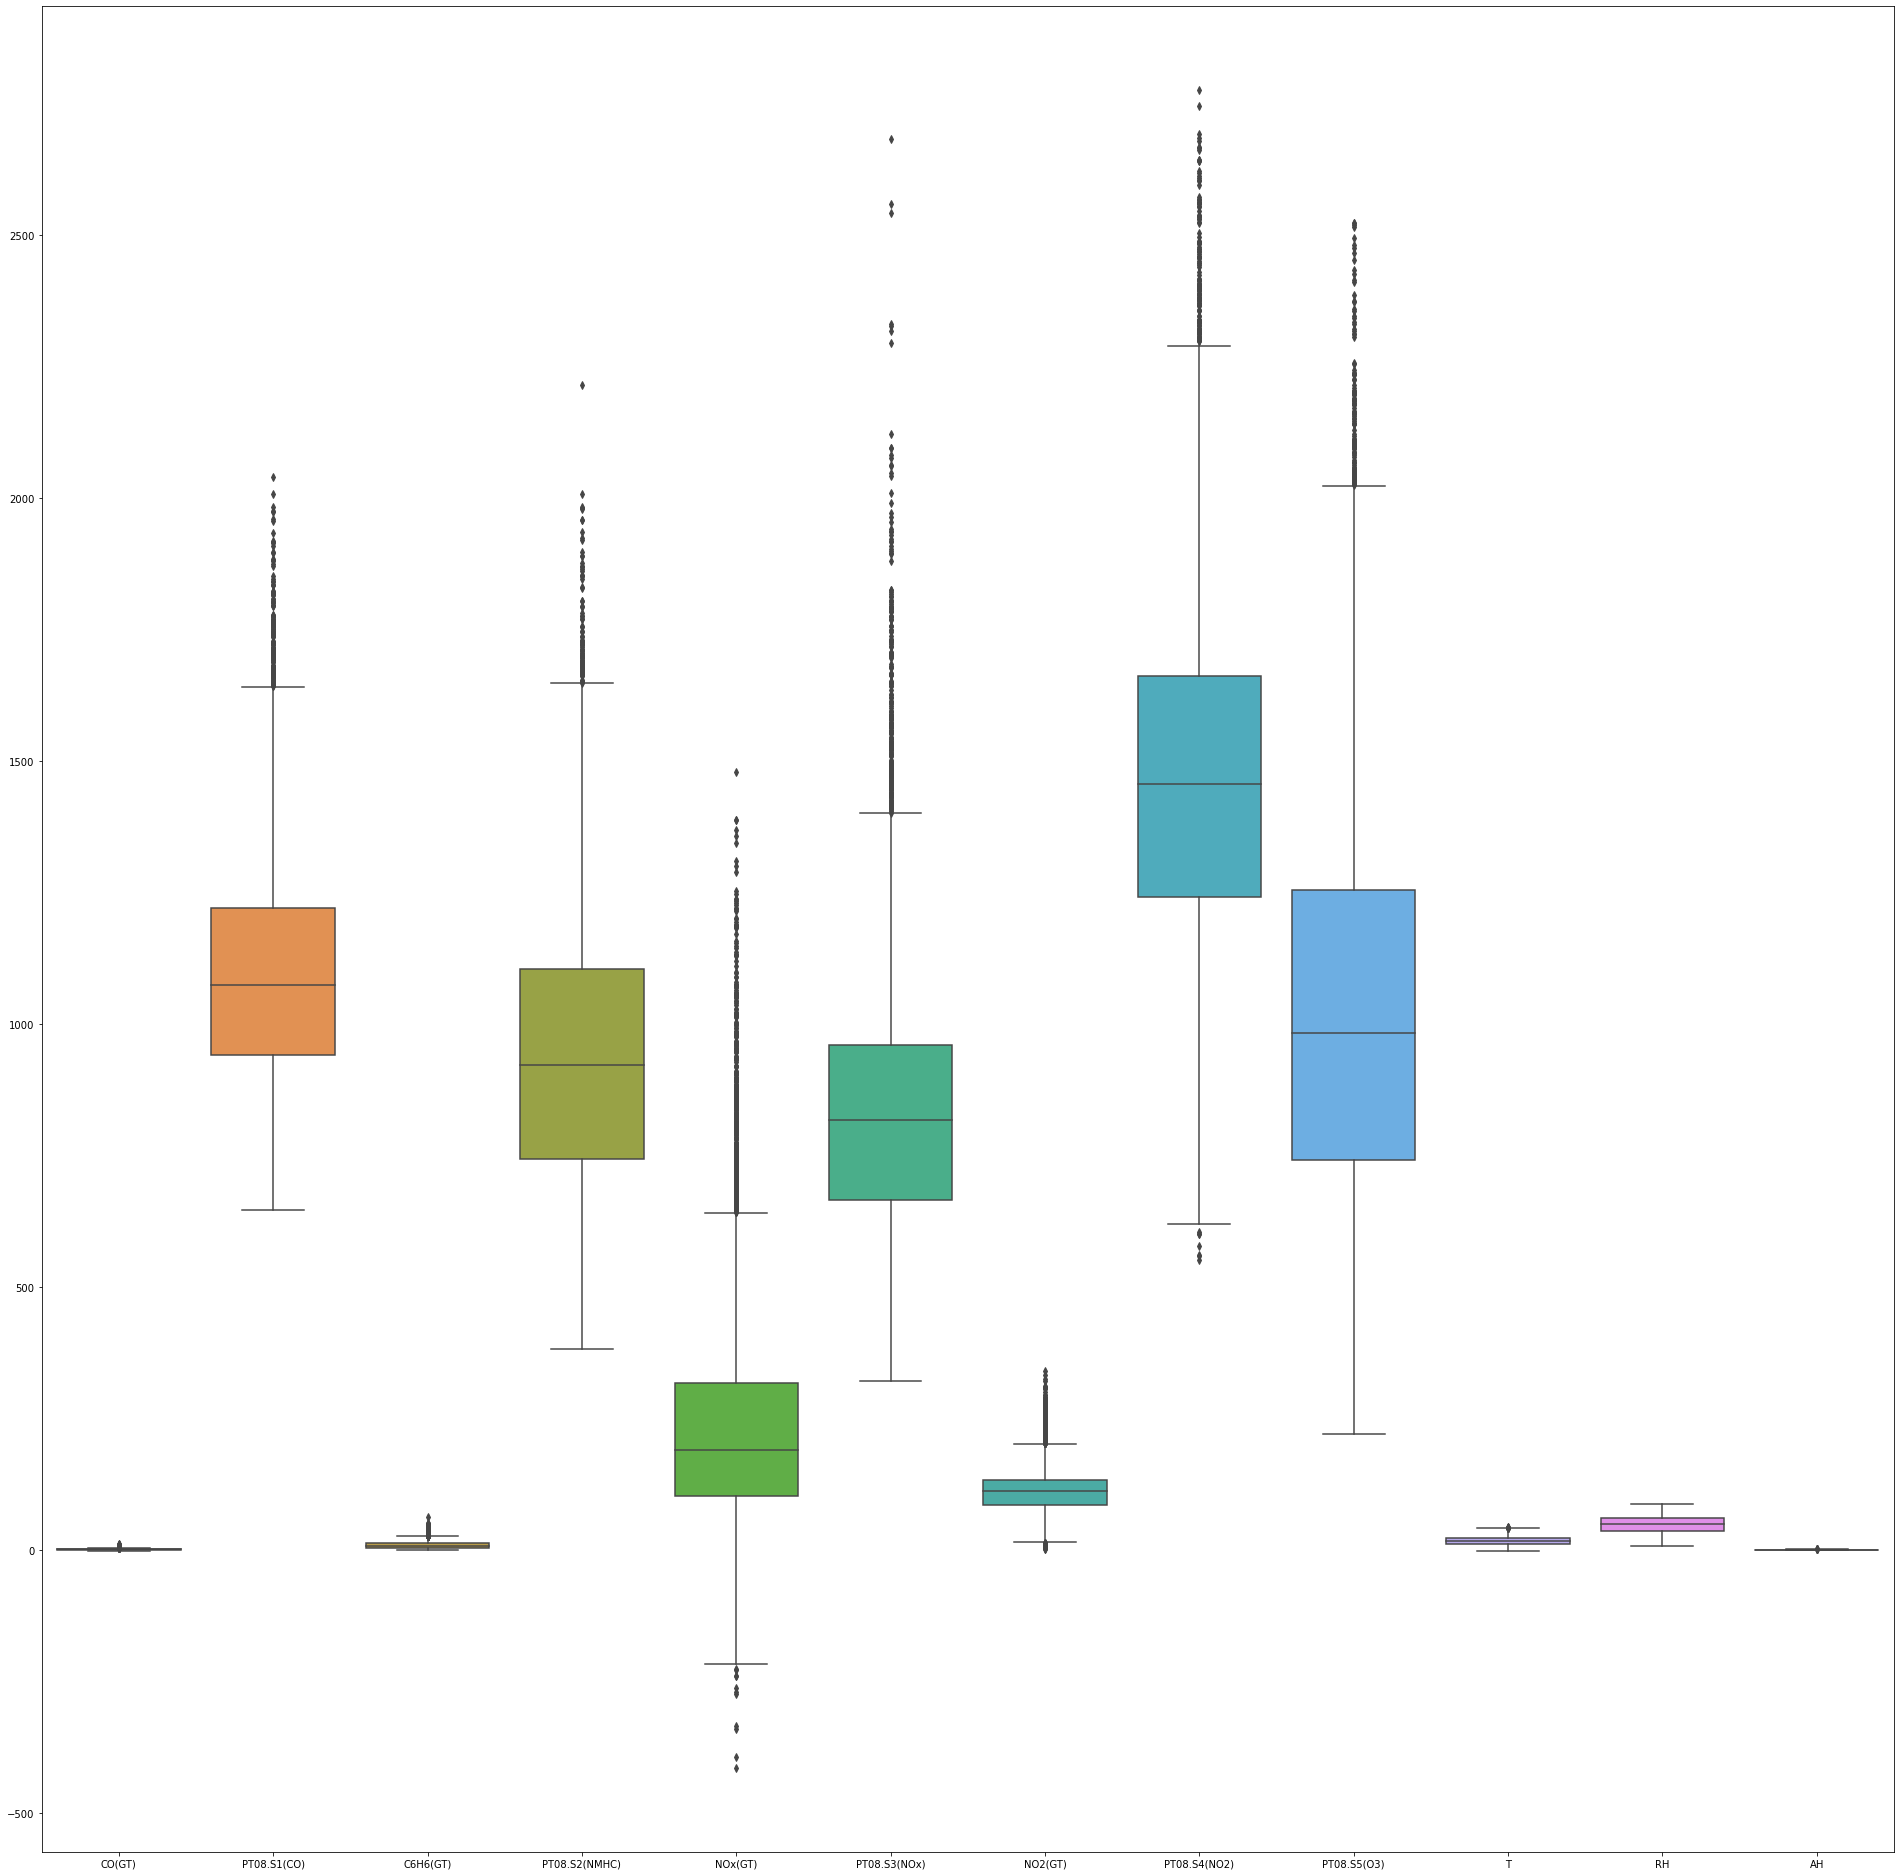

In [81]:
#The last step for this data cleaning the outliers
fig = plt.figure(figsize=(130,130))
cols = [dfCurrent.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=dfCurrent[col], ax=ax)

    fig.tight_layout()

In [82]:
#Here I applied z-score-elimination after filling nans with model. Now I cleaned the outliers and my data is ready
dfCurrent_z_score = outlierElimination(dfCurrent)

C:\Users\bahak\AppData\Local\Temp\ipykernel_10204\1323301449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].median())


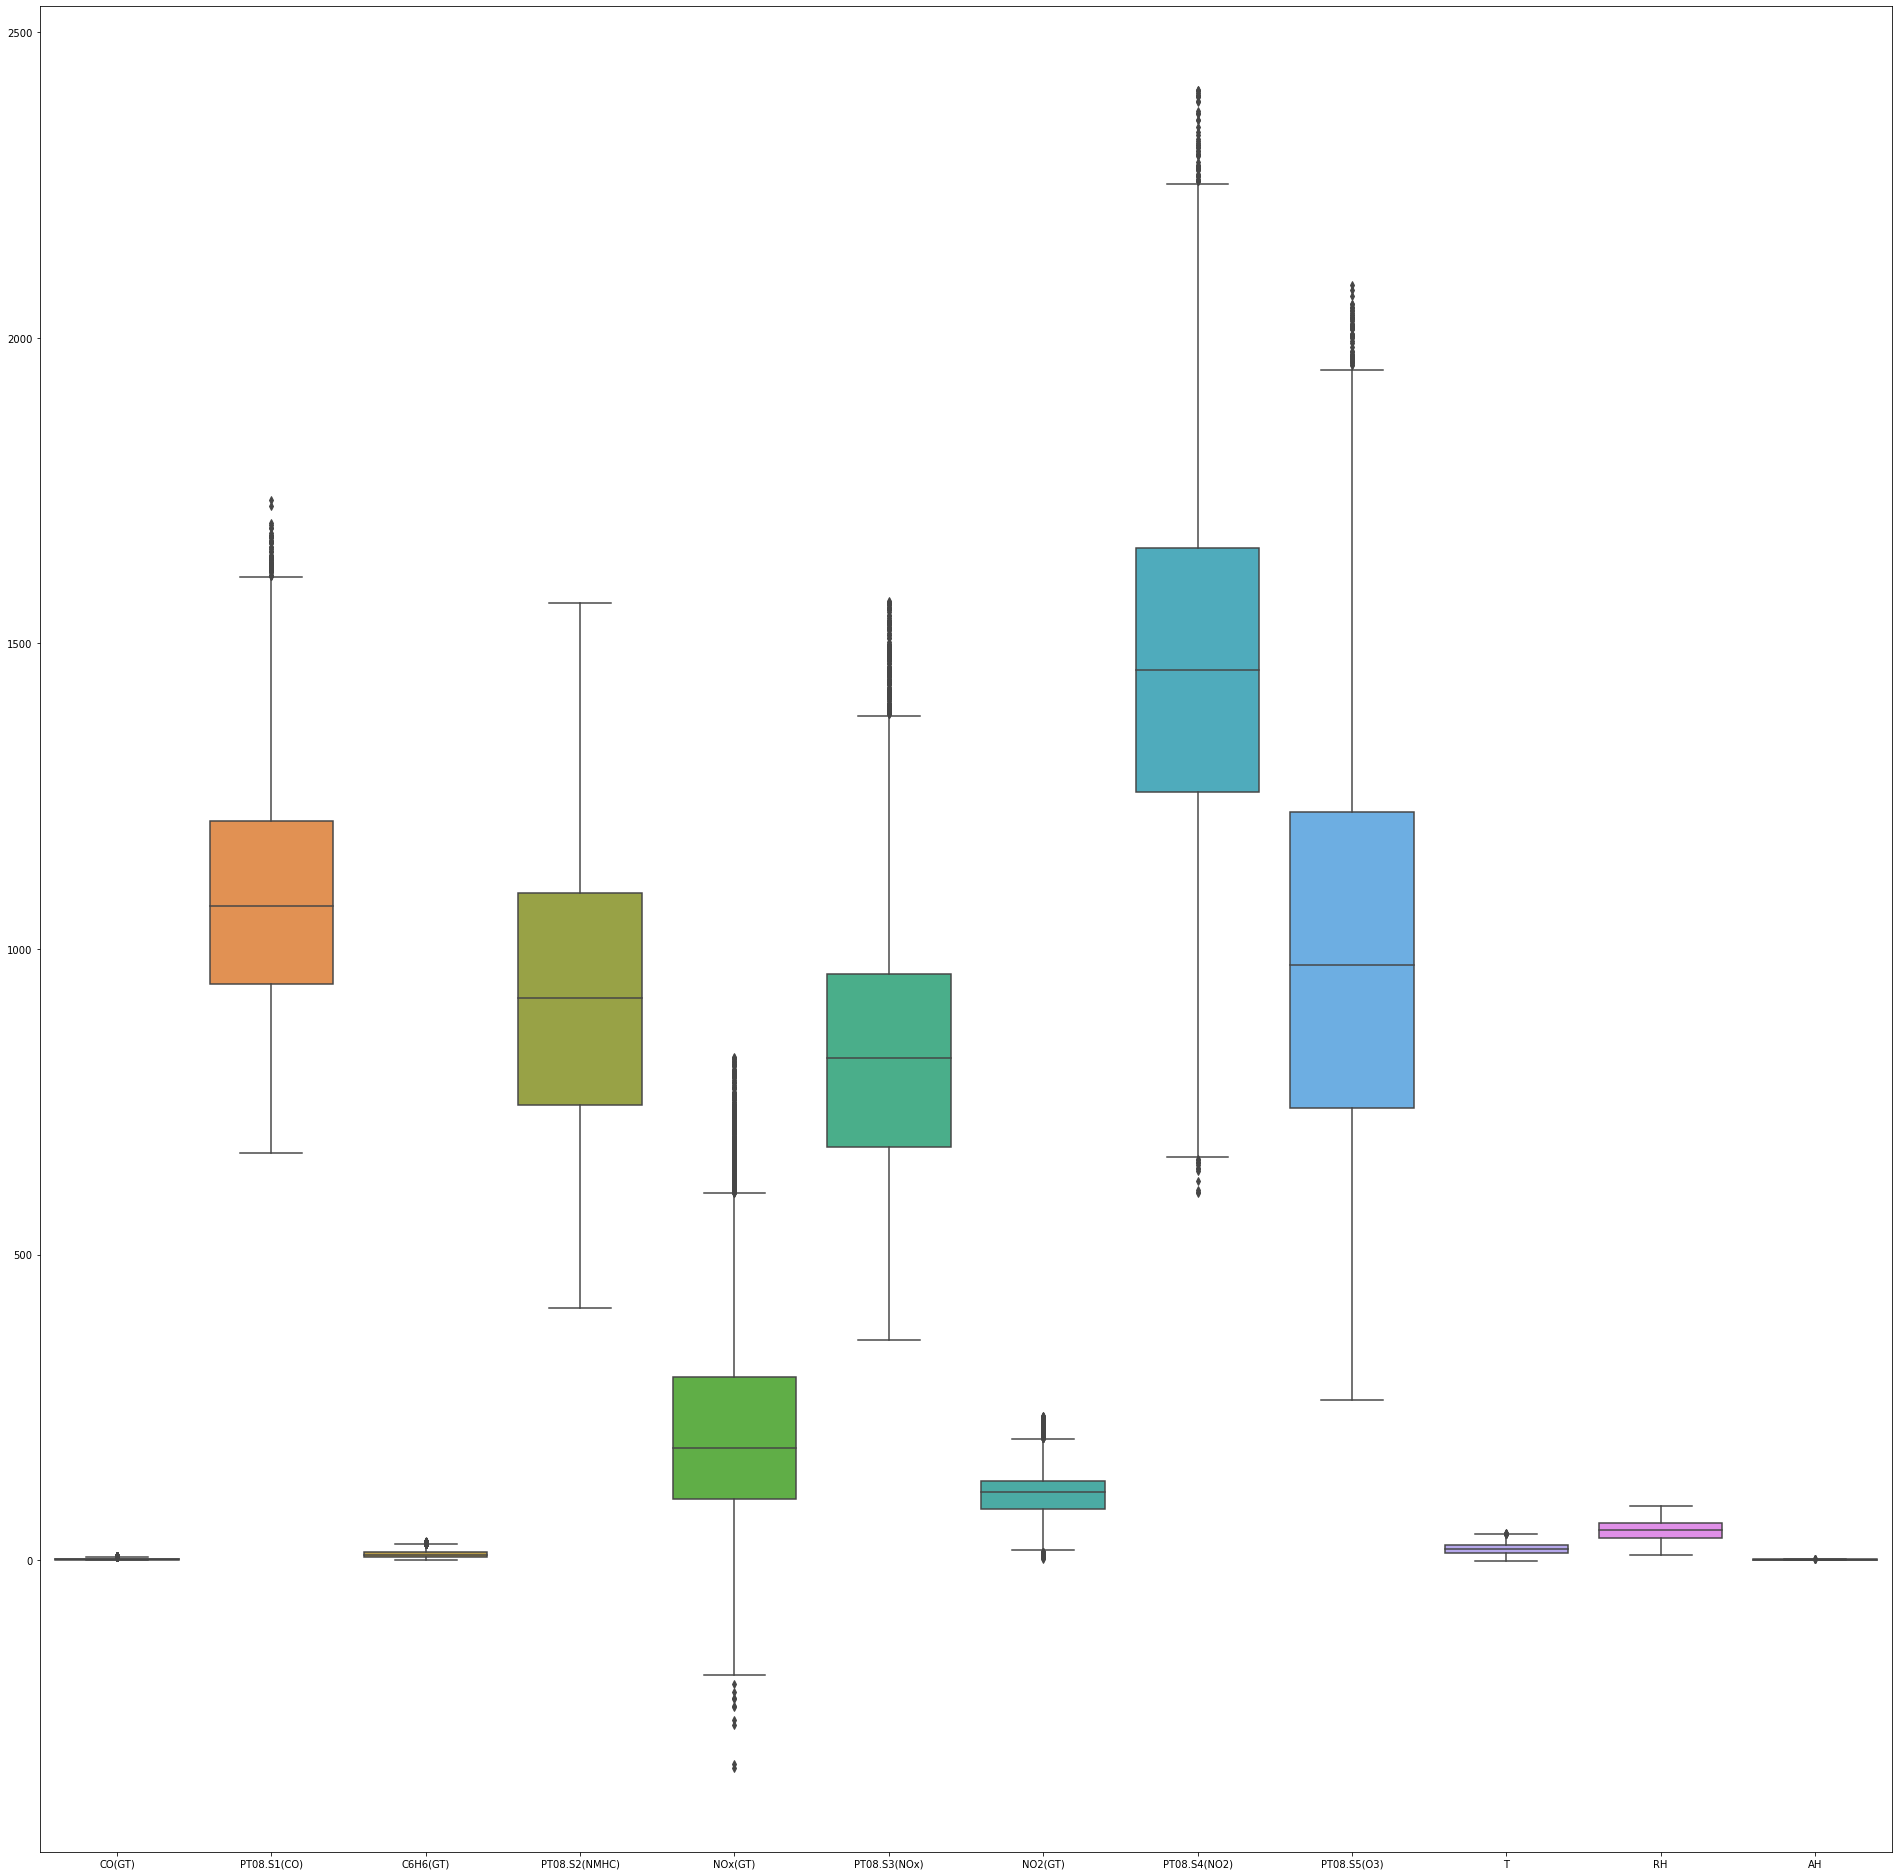

In [83]:
#As we can see the data is smooth
fig = plt.figure(figsize=(130,130))
cols = [dfCurrent_z_score.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=dfCurrent_z_score[col], ax=ax)

    fig.tight_layout()

In [84]:
dfCurrent_z_score

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1.580827,1360.0,11.9,1046.0,-215.791241,1056.0,108.479531,1692.0,1268.0,13.6,48.9,0.7578
1,0.542213,1292.0,9.4,955.0,-202.646838,1174.0,107.460315,1559.0,972.0,13.3,47.7,0.7255
2,4.662051,1402.0,9.0,939.0,277.386774,1140.0,125.954851,1555.0,1074.0,11.9,54.0,0.7502
3,2.365558,1376.0,9.2,948.0,60.767006,1092.0,111.558415,1584.0,1203.0,11.0,60.0,0.7867
4,2.267467,1272.0,6.5,836.0,196.417249,1205.0,116.654499,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.100000,1314.0,13.5,1101.0,472.000000,539.0,190.000000,1374.0,1729.0,21.9,29.3,0.7568
9353,2.400000,1163.0,11.4,1027.0,353.000000,604.0,179.000000,1264.0,1269.0,24.3,23.7,0.7119
9354,2.400000,1142.0,12.4,1063.0,293.000000,603.0,175.000000,1241.0,1092.0,26.9,18.3,0.6406
9355,2.100000,1003.0,9.5,961.0,235.000000,702.0,156.000000,1041.0,770.0,28.3,13.5,0.5139


In [85]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [86]:
#Here I normalized the data and we can see the different with df_z_score and df data
dfCurrent_z_scoreNormalized = preprocessing.normalize(dfCurrent_z_score)
dfCurrent_z_scoreNormalized = pd.DataFrame(dfCurrent_z_scoreNormalized,columns = dfCurrent_z_score.columns)
dfCurrent_z_scoreNormalized.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.000539,0.464010,0.004060,0.356878,-0.073624,0.360290,0.037011,0.577283,0.432621,0.004640,0.016684,0.000259
1,0.000199,0.475270,0.003458,0.351303,-0.074545,0.431863,0.039530,0.573488,0.357556,0.004892,0.017547,0.000267
2,0.001668,0.501534,0.003220,0.335906,0.099229,0.407809,0.045058,0.556266,0.384199,0.004257,0.019317,0.000268
3,0.000838,0.487687,0.003261,0.335994,0.021537,0.387031,0.039539,0.561407,0.426372,0.003899,0.021265,0.000279
4,0.000841,0.471531,0.002410,0.309906,0.072812,0.446694,0.043244,0.552344,0.411478,0.004152,0.022094,0.000292


In [87]:
#Lastly, I used a different scaler method and see the difference between two data.
scaler = preprocessing.MinMaxScaler()
dfCurrent_z_scoreScaled = scaler.fit_transform(dfCurrent_z_score)
scaled_df = pd.DataFrame(dfCurrent_z_scoreScaled, columns=dfCurrent_z_score.columns)
scaled_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.287489,0.648876,0.382838,0.549393,0.106612,0.575207,0.455041,0.604767,0.551535,0.333333,0.499371,0.287139
1,0.130677,0.585206,0.300330,0.470537,0.117906,0.672727,0.450685,0.531042,0.389254,0.326882,0.484277,0.270955
2,0.752699,0.688202,0.287129,0.456672,0.530350,0.644628,0.529722,0.528825,0.445175,0.296774,0.563522,0.283331
3,0.405970,0.663858,0.293729,0.464471,0.344231,0.604959,0.468198,0.544900,0.515899,0.277419,0.638994,0.301618
4,0.391160,0.566479,0.204620,0.367418,0.460781,0.698347,0.489976,0.492794,0.464912,0.281720,0.633962,0.302670


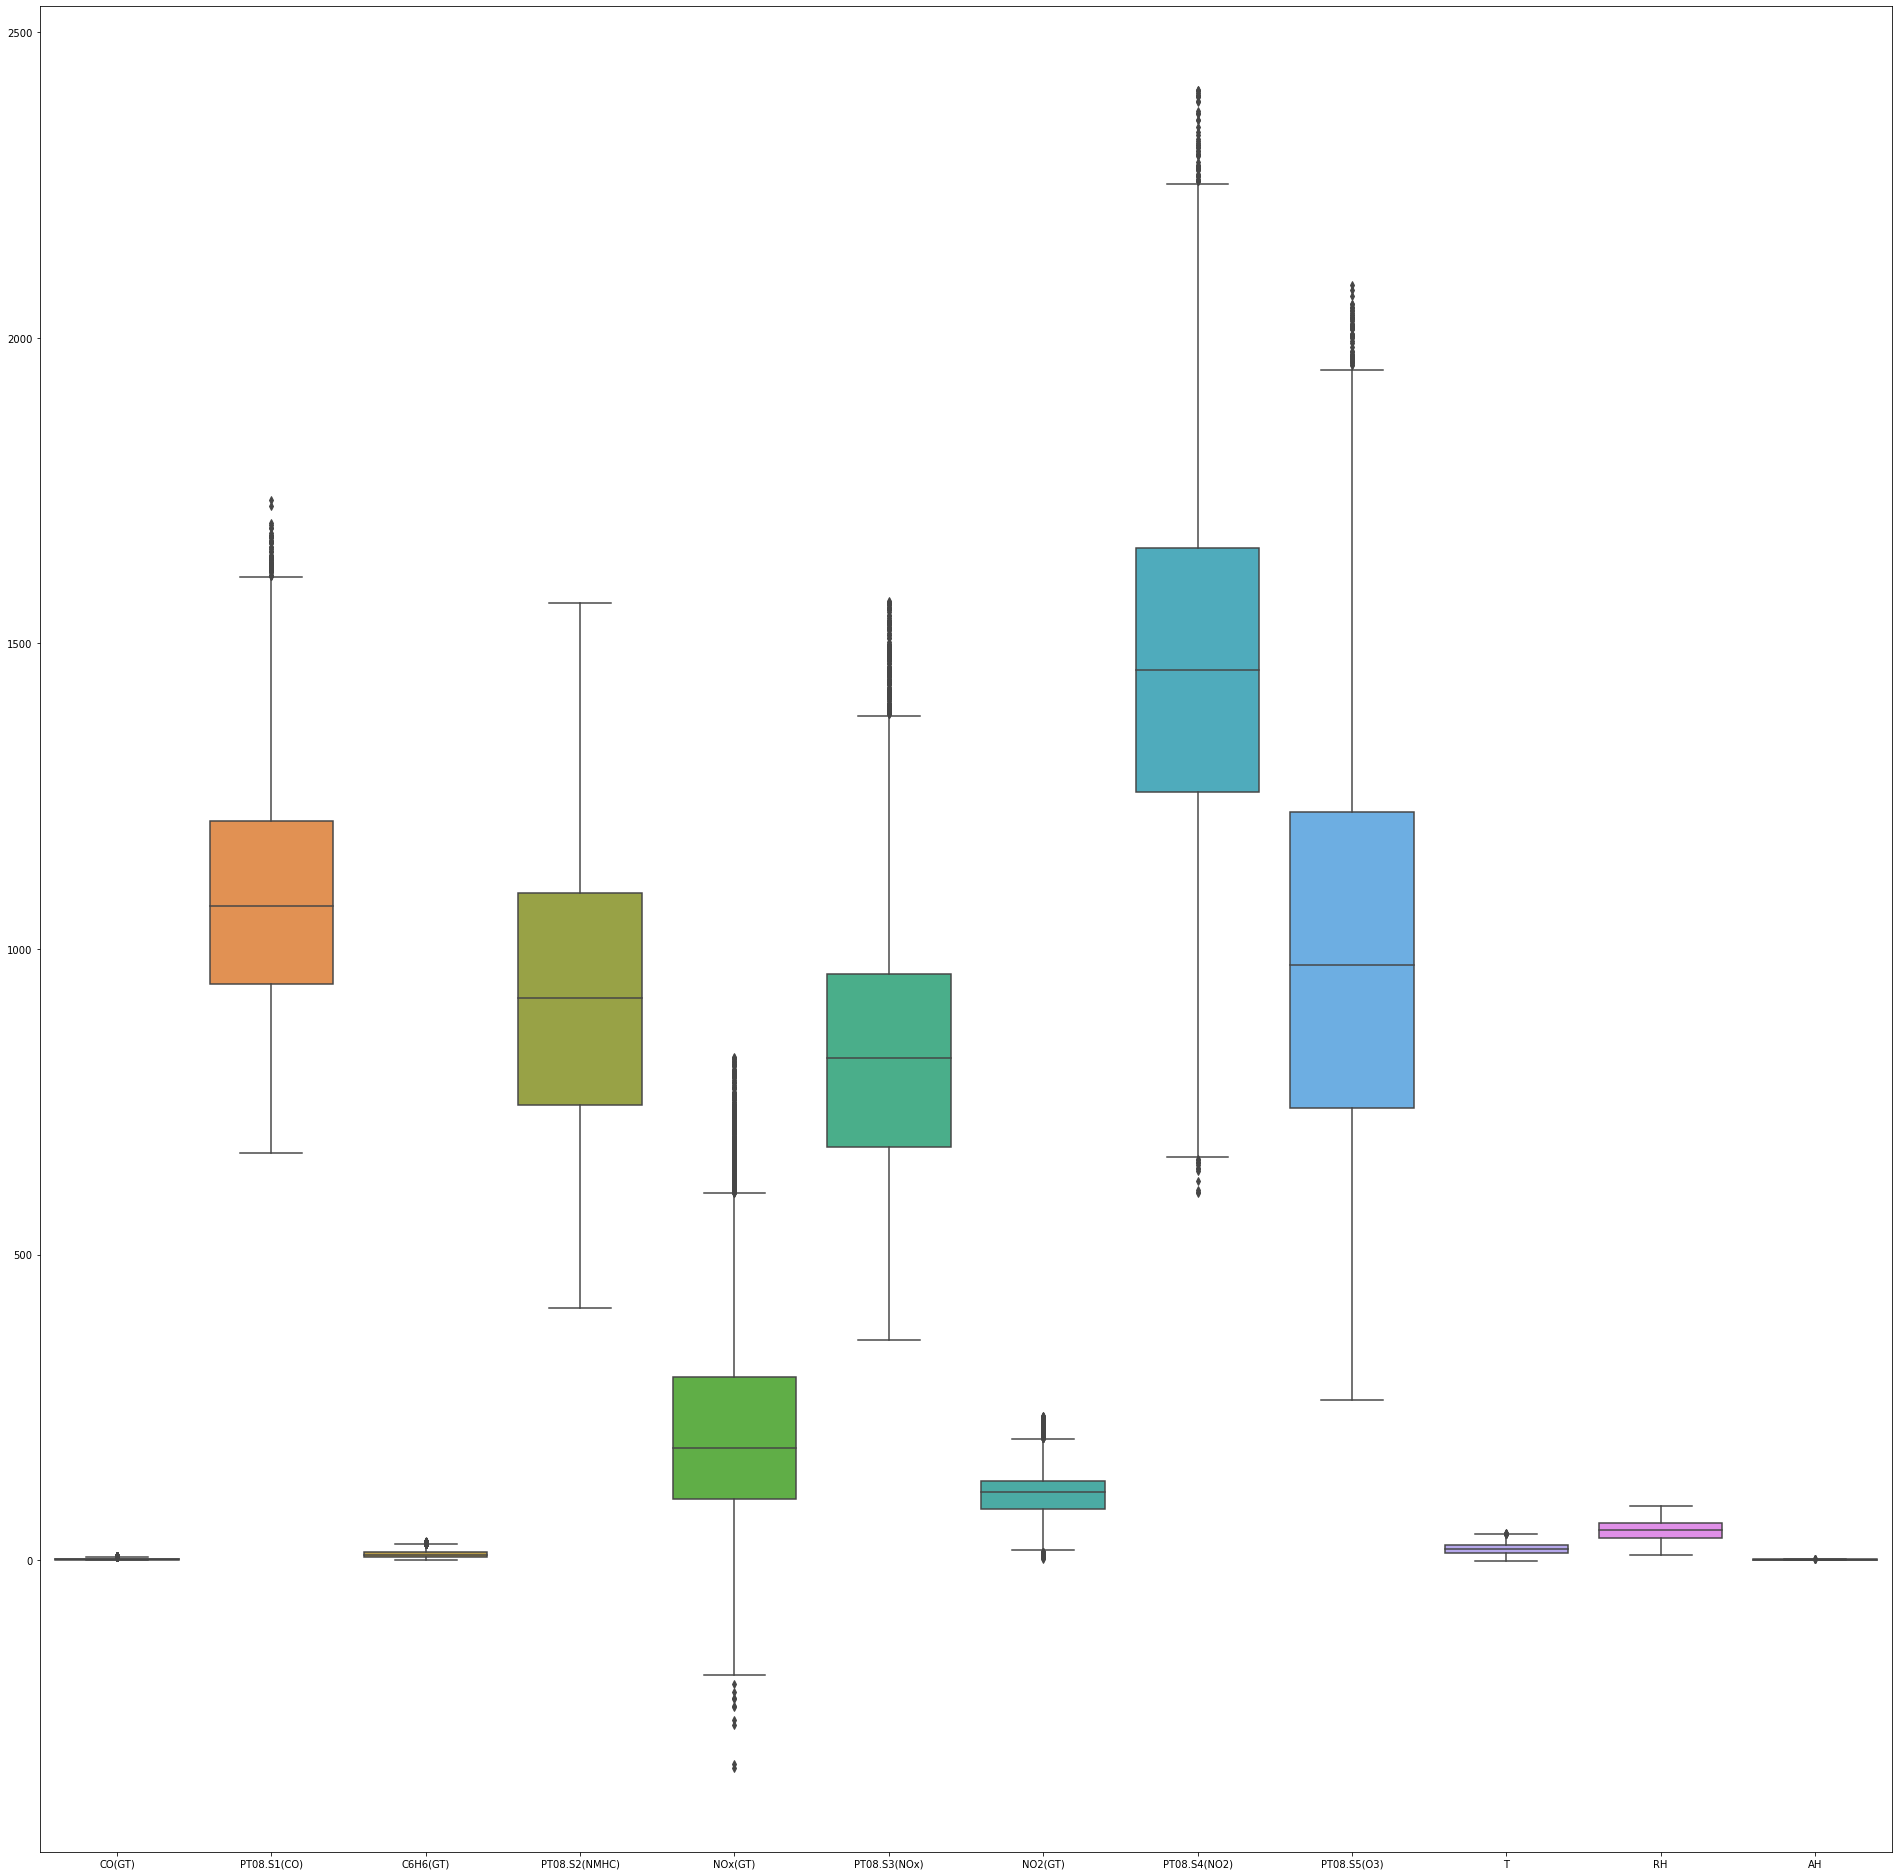

In [89]:
#The last data heatmap
fig = plt.figure(figsize=(130,130))
cols = [dfCurrent_z_score.columns]


for i, col in enumerate(cols):
    ax = fig.add_subplot(5,5,i+1)
    sns.boxplot(data=dfCurrent_z_score[col], ax=ax)

    fig.tight_layout()

<h1>Conclusion Raport<h1>


<h3>        In this assignment, I have a dataset that should have been preprocessed. Firstly, I go with a way that showed in assignment pdf. I do whatever should have been done in order. The first step was data cleaning, I reduced the row, column numbers. Also, I refill the error values as nan and obtain that I should delete the NMHC(GT) after that, I started to filling columns with relationshipment. The big ones have been filled with model prediction the other low nan numbers have been filled with mean. I separated data two parts one makes z-score without modelling. Also, cleans the NaN values and outliers. The other one first fill with mean and model prediction after that, I apply z-score elimination to detect and clean outlier. Finally, I showed all part of these two data preprocessing stage. The final two boxplots have been compared and I saw that the filling with model makes the final data better. As a conclusion, the model should be selected correctly and, the stage of preprocessing should have been shown part and part to see the difference and incomplete part. <h3>